In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')

from sim.LoadBalancer import LoadBalancer
from sim.Source import ArrivalSchedule, Source, ExponentialSource
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancer
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import pandas as pd

KeyboardInterrupt: 

### Test for fixed rate

In [22]:
from BinarySearch import binaryServerSearch

opt = binaryServerSearch(10,[0,40])
print(opt)

KeyboardInterrupt: 

In [24]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

stopTime = 4*7*24*60*60
env = Environment(stopTime=stopTime)

#model = LinearRegression()
#model = DecisionTreeRegressor()
#model  = MLPRegressor(hidden_layer_sizes=[10], activation='tanh')
model  = RandomForestRegressor(n_estimators=10)
eta = lambda t: sigmoid(2-0.01*t)
#eta = 0.4
#sigmoid(2/(0.1*t+2)-0.5)
periodLength = 0.5*60*60 #half an hour per period -> schedule repeated two times in 12 hours
loadBalancer = GreedyEpsilonLoadBalancer(nServers=10, environment=env, model = model, eta=eta, nServerRange=[10,45], usePartialFit=False, periodLength=periodLength)

requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalsPerSecond = 10
source = ExponentialSource(arrivalsPerSecond, requestTypes, loadBalancer, env)
arrivalSchedule = [10.960967693036116,9.204380085685141,8.682182814441353,8.666107452385948,8.026516748360558,10.534588367379193,12.737310115591725,15.063455265891585,16.514479685434043,17.532619790560037,17.86111992970631,18.880432410707943,18.308766424397923,17.79975757676712,17.431113084884405,16.987043122433054,16.64700708052818,16.588909358658892,16.702272849261103,17.789801997398207,18.66802964304326,17.9570008518801,15.969355037489754,14.835536103552359,10.83793626141116,9.102044131100833,8.161240506689088,7.37112661260312,8.803298919445526,9.148114150826474,12.938108399643555,15.3611441561858,16.71074869458027,17.91390000627908,17.565110860509453,18.49178590356225,18.3339489829179,17.639366571830326,17.364870418935375,16.879700975944793,16.892783108256637,16.63770685793193,17.42522465464323,17.9506170606013,18.527343394495094,18.014980497491667,15.870730129185258,15.098517666417065,12.456040272458953,9.760688603844484,8.431628183305953,8.36249432919184,9.873376450020322,10.773621685223354,14.495244531514661,16.308448168351187,17.789352057319245,19.335394482668093,19.757914251416377,20.49483858817948,19.828895899850746,19.950662488234254,19.15117131336894,18.85682070429244,18.929195308482694,18.289593007057388,19.03266277344793,19.949743325222805,20.579640014425536,20.08413949545226,17.21375127765588,16.36029241732451,11.29692908482264,9.031321329760342,8.20123493315046,7.793816189819631,9.098276320738957,10.15657829756458,12.735308057706542,15.12681618050728,16.250794050456292,17.25100978367991,18.058018642616457,18.515209708659004,18.148407466457215,17.449460111795513,17.150801024395165,17.032862378367717,17.101453091191157,16.691523775149648,17.027891579547703,17.807247590761172,18.590712113832506,17.695833083233467,15.937941359140508,14.973064260348156,13.110378183119213,10.96515347171014,9.89288274754059,9.730997737761966,10.390707554187198,11.915046032325408,15.43705063167904,17.908905205529322,19.972872692294242,21.14901842332865,21.760662487832096,22.57633551479093,21.566495618788032,21.448040533455963,20.99530847253523,20.157407778939255,20.208627177699583,20.07021810621268,20.569645562188374,21.722338445928422,22.15638237370256,21.251320487475297,18.916949809788925,17.968088299814934,14.502412586289212,11.4763752396351,10.709318594186866,11.056469550282136,11.043018342334813,12.811831530006469,17.024828192906458,19.513896041380665,21.21203917759762,22.660089154307023,23.50890139965305,24.202508409026336,23.282421849974263,23.174255345694498,22.53032630213816,22.04592396984701,21.985703629493525,21.891912843896687,22.231974188804987,23.25687184003971,24.095314889025804,23.412874269565627,20.677610853921855,19.54740649952944,14.555818442662675,11.845328576619576,10.430566553176714,10.28418349904727,11.317460932720667,13.237756511393835,16.73690976814556,19.444639140951384,21.45251435049502,22.60318471724722,23.12063429094119,24.36957995543761,23.40207803043295,22.85543144551364,22.970872717962322,21.853712849237926,21.8537371606143,21.85152622304005,21.753387641136285,23.153912202957503,24.067943184941022,23.494466424270815,20.657380657515766,19.531892346717584]

arrivalSchedule = ArrivalSchedule(periodLength,arrivalSchedule=arrivalSchedule, environment=env, loadBalancer=loadBalancer, source=source)
env.run(debug=False)

19538 1298 10 5058.0
36
16578 6 36 11118.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan
(1, 8) (1, 1)
40
15615 0.0 40 9615.0
0.599999999999999
(2, 8) (2, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15542 0.0 28 11342.0
0.7240045796125791
(3, 8) (3, 1)
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14564 0.0 43 8114.0
0.6807724324777964
(4, 8) (4, 1)
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18854 0.0 20 15854.0
0.9439045942525724
(5, 8) (5, 1)
10


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22657 1275 10 8407.0
0.8638801618426046
(6, 8) (6, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27255 3 27 23175.0
0.7735229916326652
(7, 8) (7, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29463 954 21 16773.0
0.8127081187922062
(8, 8) (8, 1)
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31612 1440 14 15112.0
0.8218863051148008
(9, 8) (9, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31874 1878 18 10394.0
0.6570176335485116
(10, 8) (10, 1)
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33961 1277 23 17741.0
0.7987650974929061
(11, 8) (11, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33386 16 30 28726.0
0.7298493763998383
(12, 8) (12, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32072 1838 18 10992.0
0.7433425786592409
(13, 8) (13, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31474 18 33 26344.0
0.7937420773147603
(14, 8) (14, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30414 271 25 23954.0
0.8426953713470785
(15, 8) (15, 1)
10


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29587 2605 10 2037.0
0.8181955730536115
(16, 8) (16, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30248 14 39 24258.0
0.8573871426886539
(17, 8) (17, 1)
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29842 0.0 36 24442.0
0.9119381506893407
(18, 8) (18, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32134 0.0 39 26284.0
0.9270964708707623
(19, 8) (19, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33562 1073 24 19232.0
0.9136310445146808
(20, 8) (20, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32371 76 28 27411.0
0.8905809786434022
(21, 8) (21, 1)
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28819 1630 17 9969.0
0.9313628986042659
(22, 8) (22, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26867 14 39 20877.0
0.912709121524013
(23, 8) (23, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19489 0.0 45 12739.0
0.924615021232794
(24, 8) (24, 1)
44


/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16367 0.0 44 9767.0
0.9304197817441091
(25, 8) (25, 1)
33
14845 0.0 33 9895.0
0.9272794936915514
(26, 8) (26, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13364 0.0 30 8864.0
0.9185576742588669
(27, 8) (27, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15993 0.0 18 13293.0
0.9393074130248728
(28, 8) (28, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16490 0.0 33 11540.0
0.939664320168284
(29, 8) (29, 1)
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23160 2 22 19840.0
0.8933753979939443
(30, 8) (30, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27443 1001 19 14583.0
0.8929613704233061
(31, 8) (31, 1)
10


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29989 2548 10 3009.0
0.9278569546779056
(32, 8) (32, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32218 822 24 20398.0
0.9202418916639242
(33, 8) (33, 1)
Max reward for 16305.9 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31840 304 26 24900.0
0.9140222096721192
(34, 8) (34, 1)
Max reward for 20213.4 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33405 2 38 27685.0
0.9408167344233761
(35, 8) (35, 1)
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32934 0.0 37 27384.0
0.9408188843594639
(36, 8) (36, 1)
Max reward for 23550.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31464 0.0 38 25764.0
0.9340294352604767
(37, 8) (37, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31124 0.0 45 24374.0
0.9616854124696206
(38, 8) (38, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30463 0.0 31 25813.0
0.9359705596145085
(39, 8) (39, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30572 0.0 33 25622.0
0.961615336301569
(40, 8) (40, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29698 0.0 45 22948.0
0.965026869749615
(41, 8) (41, 1)
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31356 0.0 43 24906.0
0.961778149400296
(42, 8) (42, 1)
Max reward for 25012.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32394 0.0 30 27894.0
0.9636200072015327
(43, 8) (43, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33612 868 25 21182.0
0.9570166775411005
(44, 8) (44, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32615 1519 21 14275.0
0.9445839508435996
(45, 8) (45, 1)
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28769 3 34 23639.0
0.9550820148855915
(46, 8) (46, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27171 1465 16 10121.0
0.9521846292441005
(47, 8) (47, 1)
Max reward for 13216.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22540 4 25 18750.0
0.9651141362750922
(48, 8) (48, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17665 0.0 45 10915.0
0.939922039220557
(49, 8) (49, 1)
Max reward for 9810.9 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15171 0.0 22 11871.0
0.9673926051423306
(50, 8) (50, 1)
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15075 0.0 34 9975.0
0.9503203840396282
(51, 8) (51, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17633 510 13 10583.0
0.9709483150391549
(52, 8) (52, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19393 3 33 14413.0
0.9201888507290318
(53, 8) (53, 1)
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26208 0.0 38 20508.0
0.9389482721526944
(54, 8) (54, 1)
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29395 0.0 37 23845.0
0.9633571945929374
(55, 8) (55, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32025 0.0 44 25425.0
0.9395208806452233
(56, 8) (56, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35142 1927 16 13472.0
0.949777148336772
(57, 8) (57, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35836 657 28 25066.0
0.9321159511101238
(58, 8) (58, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37207 2 45 30437.0
0.9326473855597043
(59, 8) (59, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35642 48 31 30512.0
0.9249307672133428
(60, 8) (60, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35689 2558 13 8159.0
0.9506435504729102
(61, 8) (61, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34801 2150 18 10601.0
0.9385987766395605
(62, 8) (62, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34114 2007 19 11194.0
0.9485392582060655
(63, 8) (63, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34104 1705 21 13904.0
0.9593650303971306
(64, 8) (64, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32651 32 39 26481.0
0.9608686821447482
(65, 8) (65, 1)
Max reward for 24448.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34329 4 31 29639.0
0.9455688960280427
(66, 8) (66, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36009 671 28 25099.0
0.9633906035602876
(67, 8) (67, 1)
Max reward for 27817.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37088 392 30 28668.0
0.960571617856579
(68, 8) (68, 1)
Max reward for 28528.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36290 128 31 30360.0
0.9483107926683687
(69, 8) (69, 1)
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30903 835 23 19103.0
0.9556622693043015
(70, 8) (70, 1)
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29364 2 36 23944.0
0.9624665264302824
(71, 8) (71, 1)
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20208 0.0 41 14058.0
0.9678559744389252
(72, 8) (72, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16440 0.0 24 12840.0
0.9527145556937572
(73, 8) (73, 1)
Max reward for 10271.7 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14640 0.0 22 11340.0
0.9493703950418266
(74, 8) (74, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13976 0.0 39 8126.0
0.9347956847296185
(75, 8) (75, 1)
Max reward for 10703.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16470 0.0 22 13170.0
0.9343679550450691
(76, 8) (76, 1)
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18043 0.0 17 15493.0
0.9486342649650586
(77, 8) (77, 1)
Max reward for 14247.5 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22999 0.0 23 19549.0
0.9541254361084766
(78, 8) (78, 1)
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26936 265 22 20986.0
0.9456735706032776
(79, 8) (79, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29175 0.0 28 24975.0
0.9480656352254553
(80, 8) (80, 1)
Max reward for 18805.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31034 0.0 37 25484.0
0.951498341349382
(81, 8) (81, 1)
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32428 0.0 32 27628.0
0.946150803621197
(82, 8) (82, 1)
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33258 1133 14 19828.0
0.9555094508177202
(83, 8) (83, 1)
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32956 3 43 26476.0
0.9548254611905224
(84, 8) (84, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31437 0.0 31 26787.0
0.9569630562976613
(85, 8) (85, 1)
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31021 0.0 29 26671.0
0.9474104787373505
(86, 8) (86, 1)
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30896 0.0 35 25646.0
0.9556444157125815
(87, 8) (87, 1)
Max reward for 26056.1 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30874 0.0 31 26224.0
0.953042537740634
(88, 8) (88, 1)
Max reward for 25139.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29918 0.0 30 25418.0
0.9541849151559357
(89, 8) (89, 1)
Max reward for 25410.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30707 0.0 29 26357.0
0.9556355736682551
(90, 8) (90, 1)
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31792 1588 20 12912.0
0.9585873729882831
(91, 8) (91, 1)
Max reward for 25225.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33367 20 30 28667.0
0.9560023824793258
(92, 8) (92, 1)
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31902 997 23 18482.0
0.9600342258513294
(93, 8) (93, 1)
10


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28643 2241 10 4733.0
0.9586186512431853
(94, 8) (94, 1)
Max reward for 17354.8 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27083 38 33 21753.0
0.9577782858058356
(95, 8) (95, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23758 0.0 39 17908.0
0.9619759118632693
(96, 8) (96, 1)
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19780 0.0 23 16330.0
0.9611222264194208
(97, 8) (97, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17884 795 12 8134.0
0.958650718769751
(98, 8) (98, 1)
Max reward for 14561.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17585 0.0 27 13535.0
0.9584491566233572
(99, 8) (99, 1)
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18593 0.0 26 14693.0
0.962779501522548
(100, 8) (100, 1)
Max reward for 13872.6 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21149 0.0 23 17699.0
0.9623290011071769
(101, 8) (101, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27696 16 25 23786.0
0.9619972267081036
(102, 8) (102, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32381 630 25 22331.0
0.9637848139442762
(103, 8) (103, 1)
Max reward for 25438.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35976 97 31 30356.0
0.9662549621068749
(104, 8) (104, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38170 1086 16 24910.0
0.9597888049991536
(105, 8) (105, 1)
Max reward for 28622.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38945 800 30 26445.0
0.9442888904805837
(106, 8) (106, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40663 1517 28 21293.0
0.9581872548476634
(107, 8) (107, 1)
Max reward for 24414.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38781 962 29 24811.0
0.9486880402183195
(108, 8) (108, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38566 2296 21 12456.0
0.9502390292128526
(109, 8) (109, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37865 2976 13 6155.0
0.9637857245323741
(110, 8) (110, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36188 14 45 29298.0
0.9605794910531517
(111, 8) (111, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36237 0.0 45 29487.0
0.9594491705261922
(112, 8) (112, 1)
Max reward for 27135.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35892 11 32 30982.0
0.961801238005792
(113, 8) (113, 1)
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36701 0.0 38 31001.0
0.9541467447387129
(114, 8) (114, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38766 2356 21 12056.0
0.9527480544611617
(115, 8) (115, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39966 3648 13 1536.0
0.9593856075371464
(116, 8) (116, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38276 3392 12 2556.0
0.9620346790745148
(117, 8) (117, 1)
Max reward for 26821.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34381 77 30 29111.0
0.9626583517747098
(118, 8) (118, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32230 188 27 26300.0
0.9608783346035762
(119, 8) (119, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26087 1020 18 13187.0
0.9541622179133096
(120, 8) (120, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20849 3 40 14819.0
0.9571746891466139
(121, 8) (121, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19260 0.0 45 12510.0
0.963020016024791
(122, 8) (122, 1)
Max reward for 13173.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19911 0.0 26 16011.0
0.9622149185221285
(123, 8) (123, 1)
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19957 0.0 41 13807.0
0.9648201305353514
(124, 8) (124, 1)
11


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23061 1396 11 7451.0
0.9623447725250013
(125, 8) (125, 1)
Max reward for 14691.1 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30632 289 25 23992.0
0.963503255304041
(126, 8) (126, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35180 2052 16 12260.0
0.959110315966321
(127, 8) (127, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38287 2304 18 12547.0
0.9594142143798962
(128, 8) (128, 1)
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40564 3219 14 6274.0
0.9566795553291976
(129, 8) (129, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42427 2119 19 18387.0
0.9537377012100244
(130, 8) (130, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43415 6 40 37355.0
0.9504736356772094
(131, 8) (131, 1)
Max reward for 32719.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41970 1381 30 23660.0
0.9625501290639875
(132, 8) (132, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41924 631 33 30664.0
0.9500438357658222
(133, 8) (133, 1)
10


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40613 3883 10 283.0
0.9591409152205469
(134, 8) (134, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39648 100 40 32648.0
0.9620844714003883
(135, 8) (135, 1)
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39322 2391 20 12412.0
0.9625854463514252
(136, 8) (136, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39670 680 31 28220.0
0.9665774420426109
(137, 8) (137, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40132 2418 21 12802.0
0.9707434834927327
(138, 8) (138, 1)
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42109 8 42 35729.0
0.9743257950710553
(139, 8) (139, 1)
Max reward for 30437.2 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43413 3 40 37383.0
0.9615576546892396
(140, 8) (140, 1)
Max reward for 34330.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42125 1098 31 26495.0
0.9582411280679677
(141, 8) (141, 1)
Max reward for 36374.7 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37030 4 40 30990.0
0.9666534020641918
(142, 8) (142, 1)
Max reward for 29939.2 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35100 0.0 40 29100.0
0.9660426367417924
(143, 8) (143, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26061 781 19 15401.0
0.9692253455921676
(144, 8) (144, 1)
Max reward for 15089.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21113 29 25 17073.0
0.9635250806372442
(145, 8) (145, 1)
Max reward for 12610.2 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18562 0.0 26 14662.0
0.9655690504291936
(146, 8) (146, 1)
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18633 0.0 37 13083.0
0.9661186350831122
(147, 8) (147, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20382 0.0 31 15732.0
0.962743409061787
(148, 8) (148, 1)
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23798 788 17 13368.0
0.9649618440213641
(149, 8) (149, 1)
Max reward for 14732.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29976 7 38 24206.0
0.9629958992657456
(150, 8) (150, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35038 1160 25 19688.0
0.9636375379918829
(151, 8) (151, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38114 6 40 32054.0
0.9620825890884623
(152, 8) (152, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40944 459 33 31404.0
0.9657018234553454
(153, 8) (153, 1)
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41657 380 34 32757.0
0.9674552693682493
(154, 8) (154, 1)
Max reward for 35593.2 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43864 10 42 37464.0
0.9673842582719087
(155, 8) (155, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42406 1983 27 18526.0
0.9664042798038287
(156, 8) (156, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41292 1188 30 24912.0
0.9640587127187269
(157, 8) (157, 1)
Max reward for 32252.0 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41499 3 42 35169.0
0.9556696475894018
(158, 8) (158, 1)
Max reward for 31209.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39240 0.0 38 33540.0
0.9711977630115306
(159, 8) (159, 1)
Max reward for 28515.9 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39203 207 33 32183.0
0.9645405371795593
(160, 8) (160, 1)
11


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39343 2854 11 9153.0
0.9701289943501187
(161, 8) (161, 1)
Max reward for 32078.1 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39310 1 43 32850.0
0.9745547917438524
(162, 8) (162, 1)
Max reward for 33120.3 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41719 0.0 43 35269.0
0.9668159504768769
(163, 8) (163, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42923 1840 28 20323.0
0.9645195876649975
(164, 8) (164, 1)
Max reward for 33815.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42291 17 42 35821.0
0.96991869067412
(165, 8) (165, 1)
Max reward for 34379.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36928 0.0 42 30628.0
0.9708979764303187
(166, 8) (166, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35104 2180 18 10604.0
0.9691964383107823
(167, 8) (167, 1)
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19978 16 35 14568.0
0.9641758463707312
(168, 8) (168, 1)
Max reward for 12766.4 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16637 0.0 23 13187.0
0.9717302365014023
(169, 8) (169, 1)
Max reward for 10134.1 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15739 23 14 13409.0
0.9754378775470196
(170, 8) (170, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15551 0.0 27 11501.0
0.9671860285367506
(171, 8) (171, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14282 120 12 11282.0
0.9682029182302818
(172, 8) (172, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18916 0.0 28 14716.0
0.9651924283889011
(173, 8) (173, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23085 0.0 25 19335.0
0.9663237070924666
(174, 8) (174, 1)
Max reward for 16117.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27142 0.0 27 23092.0
0.9651225818569376
(175, 8) (175, 1)
Max reward for 15865.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29494 0.0 28 25294.0
0.9627719953051107
(176, 8) (176, 1)
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31650 1933 17 9770.0
0.9672281943397638
(177, 8) (177, 1)
Max reward for 27676.3 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32053 8 35 26723.0
0.9679776701519084
(178, 8) (178, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33831 2124 18 9891.0
0.9653062950685096
(179, 8) (179, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32933 11 30 28323.0
0.9702409868737063
(180, 8) (180, 1)
Max reward for 27115.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31879 0.0 31 27229.0
0.9683935666440954
(181, 8) (181, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31161 0.0 30 26661.0
0.9695341621290707
(182, 8) (182, 1)
Max reward for 24898.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30772 0.0 31 26122.0
0.9647636464125215
(183, 8) (183, 1)
11


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30088 2202 11 6418.0
0.9703614309614821
(184, 8) (184, 1)
Max reward for 22998.3 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29584 8 27 25454.0
0.9675516011756116
(185, 8) (185, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29928 1425 19 12828.0
0.9693195289925177
(186, 8) (186, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31839 1950 16 9939.0
0.9703963070799203
(187, 8) (187, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33733 2551 12 6423.0
0.9611714492412254
(188, 8) (188, 1)
Max reward for 26554.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32068 11 32 27158.0
0.9694988771787431
(189, 8) (189, 1)
45


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28715 0.0 45 21965.0
0.9706154639608854
(190, 8) (190, 1)
Max reward for 17356.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26495 0.0 28 22295.0
0.9679216604247287
(191, 8) (191, 1)
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19393 385 15 13293.0
0.9740313130391695
(192, 8) (192, 1)
Max reward for 12597.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16543 0.0 22 13243.0
0.9732022449834621
(193, 8) (193, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14489 0.0 25 10739.0
0.9652882064825585
(194, 8) (194, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 8301.3 23
23
13421 0.0 23 9971.0
0.9733377496847182
(195, 8) (195, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16016 0.0 25 12266.0
0.9693390068168487
(196, 8) (196, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16362 0.0 44 9762.0
0.9696164589329386
(197, 8) (197, 1)
Max reward for 9610.6 20
20
23154 35 20 19804.0
0.9751749471085457
(198, 8) (198, 1)
Max reward for 16309.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27682 0.0 27 23632.0
0.9682639932376309
(199, 8) (199, 1)
Max reward for 17547.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29950 0.0 33 25000.0
0.9713496328465395
(200, 8) (200, 1)
Max reward for 25032.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32618 20 29 28068.0
0.9702853677800097
(201, 8) (201, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31606 0.0 31 26956.0
0.9721939231476616
(202, 8) (202, 1)
Max reward for 25498.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33260 0.0 32 28460.0
0.9719364451746282
(203, 8) (203, 1)
Max reward for 26047.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33221 0.0 32 28421.0
0.9710157321000386
(204, 8) (204, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31845 0.0 31 27195.0
0.9752885767974624
(205, 8) (205, 1)
Max reward for 25706.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31282 0.0 32 26482.0
0.9714999883204153
(206, 8) (206, 1)
Max reward for 26220.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30582 0.0 32 25782.0
0.9684369808047711
(207, 8) (207, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29900 1 28 25690.0
0.9717673955851429
(208, 8) (208, 1)
Max reward for 25601.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29938 0.0 29 25588.0
0.9637206254379871
(209, 8) (209, 1)
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31812 0.0 34 26712.0
0.9767454536395674
(210, 8) (210, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32576 1657 13 14056.0
0.9699115043344017
(211, 8) (211, 1)
Max reward for 25718.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33475 28 30 28695.0
0.9738305329249185
(212, 8) (212, 1)
Max reward for 26515.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32337 0.0 30 27837.0
0.9686979168520857
(213, 8) (213, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28434 0.0 39 22584.0
0.9718207470025085
(214, 8) (214, 1)
Max reward for 18177.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26876 0.0 29 22526.0
0.9735259466652237
(215, 8) (215, 1)
Max reward for 15186.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22341 0.0 27 18291.0
0.9651344071686452
(216, 8) (216, 1)
Max reward for 12007.8 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17812 0.0 25 14062.0
0.9656172622781324
(217, 8) (217, 1)
Max reward for 12094.4 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15271 0.0 23 11821.0
0.9706675226023854
(218, 8) (218, 1)
Max reward for 8989.6 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15089 4 14 12949.0
0.9681795560948873
(219, 8) (219, 1)
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17888 0.0 43 11438.0
0.9736884603165771
(220, 8) (220, 1)
Max reward for 12574.9 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19428 0.0 23 15978.0
0.9705751046950839
(221, 8) (221, 1)
Max reward for 11505.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25662 100 22 21362.0
0.9632824157812375
(222, 8) (222, 1)
Max reward for 14886.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29315 2 38 23595.0
0.9728952740720579
(223, 8) (223, 1)
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32080 0.0 43 25630.0
0.9707578234480227
(224, 8) (224, 1)
Max reward for 23918.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34577 3 32 29747.0
0.9637482656034352
(225, 8) (225, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35664 0.0 44 29064.0
0.9706259714972276
(226, 8) (226, 1)
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36519 143 31 30439.0
0.9687336117708836
(227, 8) (227, 1)
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35643 183 30 29313.0
0.9729979566592385
(228, 8) (228, 1)
Max reward for 30113.6 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36413 7 34 31243.0
0.9632629692463933
(229, 8) (229, 1)
Max reward for 29363.7 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34582 0.0 33 29632.0
0.9705713021495112
(230, 8) (230, 1)
Max reward for 27176.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34274 0.0 32 29474.0
0.9681759102958399
(231, 8) (231, 1)
Max reward for 27158.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33824 12 30 29204.0
0.9733473203559733
(232, 8) (232, 1)
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32842 105 28 27592.0
0.9699321282680042
(233, 8) (233, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34153 2097 16 10783.0
0.9671143697943578
(234, 8) (234, 1)
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36032 1211 15 21672.0
0.969710881971956
(235, 8) (235, 1)
Max reward for 30638.0 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37276 22 42 30756.0
0.9663267301261307
(236, 8) (236, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35939 2164 19 11449.0
0.9623956694183272
(237, 8) (237, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30791 1991 16 8481.0
0.9701226998137462
(238, 8) (238, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29965 1257 13 15445.0
0.9696499304571632
(239, 8) (239, 1)
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20395 26 29 15785.0
0.9600989449300401
(240, 8) (240, 1)
Max reward for 12169.5 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16267 0.0 23 12817.0
0.961297162600286
(241, 8) (241, 1)
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14704 0.0 42 8404.0
0.9675308152287789
(242, 8) (242, 1)
Max reward for 10282.8 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14269 0.0 21 11119.0
0.9641205099984556
(243, 8) (243, 1)
Max reward for 9643.2 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16197 0.0 26 12297.0
0.9665142509159265
(244, 8) (244, 1)
Max reward for 9474.7 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18306 0.0 20 15306.0
0.9677542642377661
(245, 8) (245, 1)
Max reward for 13452.0 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22754 0.0 24 19154.0
0.96580286239104
(246, 8) (246, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 21027.4 30
30
27272 0.0 30 22772.0
0.9606952721466895
(247, 8) (247, 1)
Max reward for 21740.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29286 0.0 34 24186.0
0.9735644889238664
(248, 8) (248, 1)
Max reward for 22020.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31113 7 28 26843.0
0.962546706558822
(249, 8) (249, 1)
Max reward for 23474.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32725 17 29 28205.0
0.9678655430592875
(250, 8) (250, 1)
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33106 1415 22 15656.0
0.9719546069531424
(251, 8) (251, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32742 12 44 26022.0
0.9722871382766627
(252, 8) (252, 1)
Max reward for 24209.1 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31409 0.0 32 26609.0
0.9676733833983306
(253, 8) (253, 1)
Max reward for 24951.8 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30767 0.0 30 26267.0
0.9694697690667854
(254, 8) (254, 1)
Max reward for 23892.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31017 0.0 34 25917.0
0.965428363890474
(255, 8) (255, 1)
Max reward for 23995.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30588 0.0 32 25788.0
0.9686936255354806
(256, 8) (256, 1)
13


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30094 1517 13 12974.0
0.9657681405617363
(257, 8) (257, 1)
Max reward for 20863.6 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30645 5 35 25345.0
0.9747505911620044
(258, 8) (258, 1)
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32004 6 29 27594.0
0.9724033471218413
(259, 8) (259, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33455 2386 12 7795.0
0.9641815022532554
(260, 8) (260, 1)
Max reward for 25469.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32251 13 30 27621.0
0.9674536653379735
(261, 8) (261, 1)
Max reward for 25509.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28565 0.0 29 24215.0
0.9677938234872111
(262, 8) (262, 1)
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27195 0.0 42 20895.0
0.9649996486609238
(263, 8) (263, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23608 0.0 40 17608.0
0.9707584133027539
(264, 8) (264, 1)
Max reward for 17735.9 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19699 0.0 34 14599.0
0.9673713548500433
(265, 8) (265, 1)
Max reward for 11034.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17673 0.0 31 13023.0
0.9726956646617448
(266, 8) (266, 1)
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17508 0.0 32 12708.0
0.9694034841455439
(267, 8) (267, 1)
Max reward for 12094.8 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18825 291 15 13665.0
0.9683609310839156
(268, 8) (268, 1)
Max reward for 15128.4 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21529 2 25 17759.0
0.9669818927661495
(269, 8) (269, 1)
Max reward for 12852.2 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27638 49 24 23548.0
0.9669462842982521
(270, 8) (270, 1)
Max reward for 19288.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32113 51 28 27403.0
0.969787756464227
(271, 8) (271, 1)
Max reward for 25304.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36067 67 31 30747.0
0.9617320190231781
(272, 8) (272, 1)
Max reward for 29884.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38310 30 34 32910.0
0.9678400784127229
(273, 8) (273, 1)
Max reward for 31508.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39412 3 40 33382.0
0.9673345016496472
(274, 8) (274, 1)
Max reward for 35949.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40748 0.0 42 34448.0
0.96602303365024
(275, 8) (275, 1)
Max reward for 34459.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38770 0.0 42 32470.0
0.9681713165474303
(276, 8) (276, 1)
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38451 2116 22 13991.0
0.9663056018787737
(277, 8) (277, 1)
Max reward for 33517.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38033 9 42 31643.0
0.9663163973450379
(278, 8) (278, 1)
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36194 1736 23 15384.0
0.9668663831356643
(279, 8) (279, 1)
Max reward for 29984.8 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36554 38 33 31224.0
0.9627649824786638
(280, 8) (280, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36139 887 27 23219.0
0.963447208203309
(281, 8) (281, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36995 1674 24 16655.0
0.9662024677955703
(282, 8) (282, 1)
Max reward for 29999.9 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39427 72 34 33607.0
0.9688444548413153
(283, 8) (283, 1)
Max reward for 33330.4 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40150 0.0 43 33700.0
0.9631738433162013
(284, 8) (284, 1)
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38471 1956 17 16361.0
0.9702364004928691
(285, 8) (285, 1)
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34034 2019 19 10994.0
0.9696919475112631
(286, 8) (286, 1)
Max reward for 27736.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32565 7 30 27995.0
0.9707369859368065
(287, 8) (287, 1)
Max reward for 25775.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26473 0.0 32 21673.0
0.9670907450339412
(288, 8) (288, 1)
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20611 0.0 37 15061.0
0.9742933565758783
(289, 8) (289, 1)
Max reward for 12580.2 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19155 0.0 22 15855.0
0.971099331801122
(290, 8) (290, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 12945.9 23
23
20007 0.0 23 16557.0
0.9666918995120916
(291, 8) (291, 1)
Max reward for 12888.6 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19809 0.0 23 16359.0
0.9663350094414136
(292, 8) (292, 1)
Max reward for 12419.1 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23059 0.0 26 19159.0
0.9658760163686986
(293, 8) (293, 1)
Max reward for 18725.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30777 2 28 26557.0
0.9589387304691549
(294, 8) (294, 1)
Max reward for 24262.5 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35310 282 29 28140.0
0.9616919311381907
(295, 8) (295, 1)
Max reward for 24136.3 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38151 12 34 32931.0
0.9689856867505686
(296, 8) (296, 1)
Max reward for 30765.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40878 1 38 35168.0
0.9694141050761599
(297, 8) (297, 1)
Max reward for 34675.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42826 2 40 36806.0
0.9670955930489212
(298, 8) (298, 1)
Max reward for 35247.4 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43856 805 34 30706.0
0.9712693340098096
(299, 8) (299, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41796 2149 25 16556.0
0.9676074145072778
(300, 8) (300, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41974 27 44 35104.0
0.9707947854201479
(301, 8) (301, 1)
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40372 625 32 29322.0
0.9675738374705202
(302, 8) (302, 1)
Max reward for 33817.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39886 5 42 33536.0
0.9684543209510521
(303, 8) (303, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39851 1788 16 19571.0
0.9671483757997646
(304, 8) (304, 1)
Max reward for 34177.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39315 15 42 32865.0
0.9737938722820254
(305, 8) (305, 1)
Max reward for 33883.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40113 0.0 42 33813.0
0.9691266742686286
(306, 8) (306, 1)
Max reward for 34056.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41807 0.0 40 35807.0
0.9704832466802243
(307, 8) (307, 1)
Max reward for 35381.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43156 5 40 37106.0
0.9722350720357228
(308, 8) (308, 1)
Max reward for 35410.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42372 0.0 42 36072.0
0.9687914130891014
(309, 8) (309, 1)
Max reward for 34707.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37157 0.0 40 31157.0
0.9737084663364177
(310, 8) (310, 1)
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35340 2 34 30220.0
0.9695957913764383
(311, 8) (311, 1)
Max reward for 29831.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26016 0.0 34 20916.0
0.9651394735086715
(312, 8) (312, 1)
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21112 0.0 42 14812.0
0.9683442764893919
(313, 8) (313, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18969 0.0 24 15369.0
0.9696078868260767
(314, 8) (314, 1)
Max reward for 13829.7 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18363 0.0 24 14763.0
0.970655753499017
(315, 8) (315, 1)
Max reward for 13666.6 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20276 0.0 25 16526.0
0.9683357437222853
(316, 8) (316, 1)
Max reward for 13465.9 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23789 0.0 26 19889.0
0.9689542869557827
(317, 8) (317, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30259 0.0 39 24409.0
0.9721012514999633
(318, 8) (318, 1)
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35031 1681 22 14921.0
0.9679305579330061
(319, 8) (319, 1)
Max reward for 28071.2 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38465 459 31 29225.0
0.9725651930906118
(320, 8) (320, 1)
Max reward for 33908.6 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40812 0.0 42 34512.0
0.9695975906203251
(321, 8) (321, 1)
Max reward for 33056.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41133 0.0 40 35133.0
0.9706428500299539
(322, 8) (322, 1)
Max reward for 34124.2 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43927 1 40 37917.0
0.9706127517721758
(323, 8) (323, 1)
Max reward for 34036.3 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42238 0.0 40 36238.0
0.9690207803169175
(324, 8) (324, 1)
Max reward for 34866.1 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41128 0.0 40 35128.0
0.9702568113905773
(325, 8) (325, 1)
Max reward for 36721.3 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41577 2 40 35557.0
0.9725339295487078
(326, 8) (326, 1)
Max reward for 36873.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39314 0.0 37 33764.0
0.9720754617931421
(327, 8) (327, 1)
Max reward for 33989.2 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39583 0.0 40 33583.0
0.9677480132632265
(328, 8) (328, 1)
Max reward for 33729.8 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39547 0.0 41 33397.0
0.9741186858834676
(329, 8) (329, 1)
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39148 8 35 33818.0
0.9728935203320511
(330, 8) (330, 1)
Max reward for 33640.3 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42034 0.0 43 35584.0
0.9705530720065724
(331, 8) (331, 1)
Max reward for 35752.4 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43274 54 38 37034.0
0.973010895868899
(332, 8) (332, 1)
Max reward for 35390.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42712 2 42 36392.0
0.9740970285577983
(333, 8) (333, 1)
Max reward for 32400.9 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37589 1 35 32329.0
0.9755371618755927
(334, 8) (334, 1)
12


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34724 2907 12 3854.0
0.9724446569938927
(335, 8) (335, 1)
Max reward for 27851.3 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20232 13 34 15002.0
0.9712697223231469
(336, 8) (336, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16567 0.0 40 10567.0
0.9756685212286603
(337, 8) (337, 1)
Max reward for 10822.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15727 0.0 22 12427.0
0.9742840357859025
(338, 8) (338, 1)
Max reward for 9081.9 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15730 0.0 20 12730.0
0.973409732847227
(339, 8) (339, 1)
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14440 0.0 39 8590.0
0.9784769555839381
(340, 8) (340, 1)
Max reward for 9296.3 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19124 368 15 13194.0
0.9756741466175771
(341, 8) (341, 1)
Max reward for 12771.4 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22914 0.0 24 19314.0
0.9707668433399043
(342, 8) (342, 1)
Max reward for 18008.0 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27324 2 25 23554.0
0.9716388989234979
(343, 8) (343, 1)
18


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29703 1510 18 11903.0
0.9740612801423095
(344, 8) (344, 1)
Max reward for 24585.4 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31607 4 33 26617.0
0.972473975284905
(345, 8) (345, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 25174.0 30
30
32185 2 30 27665.0
0.9741088915191874
(346, 8) (346, 1)
Max reward for 24728.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33852 5 30 29302.0
0.9746438002282191
(347, 8) (347, 1)
Max reward for 26792.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32740 3 30 28210.0
0.976173143756244
(348, 8) (348, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31751 1316 21 15441.0
0.9694974687161597
(349, 8) (349, 1)
Max reward for 25395.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31322 6 31 26612.0
0.9725344652239153
(350, 8) (350, 1)
Max reward for 24392.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30516 2 29 26146.0
0.9717535746967253
(351, 8) (351, 1)
Max reward for 24913.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29883 0.0 30 25383.0
0.9780451868403611
(352, 8) (352, 1)
Max reward for 24408.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29562 0.0 30 25062.0
0.9747402378039941
(353, 8) (353, 1)
Max reward for 24345.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30211 0.0 28 26011.0
0.9750128617094771
(354, 8) (354, 1)
Max reward for 24045.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31755 3 29 27375.0
0.9709164605690251
(355, 8) (355, 1)
Max reward for 25230.0 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33452 2 31 28782.0
0.9743255304956837
(356, 8) (356, 1)
Max reward for 26464.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32723 6 30 28163.0
0.9767570644138015
(357, 8) (357, 1)
Max reward for 24879.2 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28714 0.0 30 24214.0
0.9713314199255184
(358, 8) (358, 1)
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26595 0.0 41 20445.0
0.9734682192127624
(359, 8) (359, 1)
Max reward for 16296.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19339 0.0 26 15439.0
0.9759101872698245
(360, 8) (360, 1)
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16490 0.0 33 11540.0
0.9753792822307342
(361, 8) (361, 1)
Max reward for 9272.3 19
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14791 0.0 19 11941.0
0.9772961620029752
(362, 8) (362, 1)
Max reward for 8501.4 19
19


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13259 0.0 19 10409.0
0.9733937293941604
(363, 8) (363, 1)
Max reward for 9683.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15801 0.0 28 11601.0
0.9726047475493903
(364, 8) (364, 1)
Max reward for 8939.2 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16295 0.0 20 13295.0
0.9743198876381173
(365, 8) (365, 1)
Max reward for 9869.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23339 1 22 20029.0
0.9739839771172653
(366, 8) (366, 1)
Max reward for 19645.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27771 0.0 28 23571.0
0.9726481063066287
(367, 8) (367, 1)
Max reward for 22977.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30124 1 28 25914.0
0.9767559877601096
(368, 8) (368, 1)
Max reward for 24168.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32451 10 29 28001.0
0.9738300145467876
(369, 8) (369, 1)
Max reward for 23522.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31760 0.0 30 27260.0
0.9749586056411563
(370, 8) (370, 1)
Max reward for 25266.5 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33259 30 29 28609.0
0.9769854498786186
(371, 8) (371, 1)
Max reward for 27433.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33282 0.0 31 28632.0
0.9765841983463283
(372, 8) (372, 1)
Max reward for 27618.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31796 0.0 30 27296.0
0.9736429462686946
(373, 8) (373, 1)
Max reward for 24771.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31062 1 29 26702.0
0.9715638626800615
(374, 8) (374, 1)
Max reward for 24735.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30444 0.0 29 26094.0
0.9728977454039811
(375, 8) (375, 1)
Max reward for 24319.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30234 0.0 29 25884.0
0.9766598382453001
(376, 8) (376, 1)
Max reward for 25361.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29757 0.0 29 25407.0
0.9676400550792316
(377, 8) (377, 1)
Max reward for 23983.4 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31263 0.0 34 26163.0
0.9736821202166214
(378, 8) (378, 1)
Max reward for 25101.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32270 19 29 27730.0
0.9721183339095274
(379, 8) (379, 1)
Max reward for 23960.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33448 2 31 28778.0
0.9743292533967773
(380, 8) (380, 1)
Max reward for 26878.2 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32305 2 31 27635.0
0.9687731975575699
(381, 8) (381, 1)
Max reward for

../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


 24815.7 32
32
28784 0.0 32 23984.0
0.974128292745188
(382, 8) (382, 1)
Max reward for 21991.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27179 0.0 28 22979.0
0.9713038980866956
(383, 8) (383, 1)
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22300 0.0 44 15700.0
0.9730356354399985
(384, 8) (384, 1)
Max reward for 14793.6 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17449 0.0 25 13699.0
0.9738303518407296
(385, 8) (385, 1)
Max reward for 13202.3 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15240 0.0 27 11190.0
0.9757100083998224
(386, 8) (386, 1)
Max reward for 8869.5 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15220 0.0 15 12970.0
0.9731568739043571
(387, 8) (387, 1)
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17722 0.0 26 13822.0
0.9739528839685316
(388, 8) (388, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 11131.3 20
20
19508 0.0 20 16508.0
0.9696819166032344
(389, 8) (389, 1)
Max reward for 11837.5 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25976 6 24 22316.0
0.969421034193963
(390, 8) (390, 1)
Max reward for 18629.0 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29127 64 25 24737.0
0.9722013615687699
(391, 8) (391, 1)
Max reward for 25324.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31770 25 28 27320.0
0.9752009835957134
(392, 8) (392, 1)
Max reward for 26290.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34721 82 30 29401.0
0.9658955596568882
(393, 8) (393, 1)
Max reward for 25680.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35168 26 31 30258.0
0.9744615565254714
(394, 8) (394, 1)
Max reward for 25084.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37179 0.0 38 31479.0
0.9766935288900689
(395, 8) (395, 1)
Max reward for 28532.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35722 8 32 30842.0
0.9764229448383981
(396, 8) (396, 1)
Max reward for 30407.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35765 0.0 34 30665.0
0.9753449281303121
(397, 8) (397, 1)
Max reward for 30408.7 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34444 0.0 35 29194.0
0.9758571676401095
(398, 8) (398, 1)
Max reward for 27960.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33783 0.0 32 28983.0
0.9754285363207235
(399, 8) (399, 1)
Max reward for 25543.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33775 15 30 29125.0
0.9728756306162899
(400, 8) (400, 1)
Max reward for 26977.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32989 1 31 28329.0
0.970805460077709
(401, 8) (401, 1)
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34396 0.0 36 28996.0
0.9746506484801901
(402, 8) (402, 1)
Max reward for 25704.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35738 12 32 30818.0
0.9748725978068364
(403, 8) (403, 1)
Max reward for 30383.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37026 0.0 34 31926.0
0.9739540980889914
(404, 8) (404, 1)
Max reward for 30613.4 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35982 0.0 33 31032.0
0.9707145268536864
(405, 8) (405, 1)
Max reward for 30119.0 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30862 0.0 34 25762.0
0.9733693179151743
(406, 8) (406, 1)
Max reward for 24721.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29429 0.0 29 25079.0
0.9771110925165684
(407, 8) (407, 1)
Max reward for 22867.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20131 0.0 29 15781.0
0.9772163812020902
(408, 8) (408, 1)
Max reward for 11928.2 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16086 0.0 25 12336.0
0.974361852609815
(409, 8) (409, 1)
Max reward for 10001.7 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14717 0.0 20 11717.0
0.9743713134484734
(410, 8) (410, 1)
Max reward for 8711.1 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14043 0.0 17 11493.0
0.9730110070103566
(411, 8) (411, 1)
Max reward for 9701.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16547 0.0 22 13247.0
0.9745848035451589
(412, 8) (412, 1)
Max reward for 9451.6 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18240 0.0 21 15090.0
0.971789068315421
(413, 8) (413, 1)
Max reward for 12544.3 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23064 0.0 26 19164.0
0.974946766136117
(414, 8) (414, 1)
Max reward for 18516.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27344 0.0 28 23144.0
0.9749738694431529
(415, 8) (415, 1)
Max reward for 18683.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29398 0.0 28 25198.0
0.968202975971833
(416, 8) (416, 1)
Max reward for 22101.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31190 6 28 26930.0
0.9749233259454412
(417, 8) (417, 1)
Max reward for 24387.5 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32783 17 29 28263.0
0.9723128813585438
(418, 8) (418, 1)
Max reward for 26637.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33347 2 31 28677.0
0.9733251981788383
(419, 8) (419, 1)
Max reward for 26524.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32851 32 29 28181.0
0.9749835995250751
(420, 8) (420, 1)
Max reward for 26124.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31349 0.0 31 26699.0
0.9716064813430488
(421, 8) (421, 1)
Max reward for 25625.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30938 0.0 33 25988.0
0.9707851115455718
(422, 8) (422, 1)
Max reward for 24253.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30909 0.0 29 26559.0
0.9765791150280179
(423, 8) (423, 1)
Max reward for 24750.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30920 10 28 26620.0
0.9742508313715406
(424, 8) (424, 1)
Max reward for 24203.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30067 0.0 30 25567.0
0.9722374268847103
(425, 8) (425, 1)
Max reward for 24035.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30559 2 28 26339.0
0.973349509796161
(426, 8) (426, 1)
Max reward for 24824.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32227 8 29 27797.0
0.972324413523532
(427, 8) (427, 1)
Max reward for 24491.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33553 8 30 28973.0
0.9733908195982734
(428, 8) (428, 1)
Max reward for 26902.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31865 1 30 27355.0
0.9705998488704711
(429, 8) (429, 1)
Max reward for 25051.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29009 0.0 31 24359.0
0.9744211238815089
(430, 8) (430, 1)
Max reward for 22608.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27111 0.0 28 22911.0
0.9762205805162714
(431, 8) (431, 1)
Max reward for 17164.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23686 0.0 28 19486.0
0.9763327692258263
(432, 8) (432, 1)
Max reward for 17635.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19562 0.0 28 15362.0
0.9732373707656248
(433, 8) (433, 1)
Max reward for 12120.9 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17519 0.0 22 14219.0
0.9760813222353246
(434, 8) (434, 1)
Max reward for 11660.5 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17322 0.0 24 13722.0
0.9771533288490046
(435, 8) (435, 1)
Max reward for 11093.2 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18810 0.0 20 15810.0
0.9752387949620641
(436, 8) (436, 1)
Max reward for 12912.0 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21551 0.0 25 17801.0
0.9722087895310856
(437, 8) (437, 1)
Max reward for 12958.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27841 76 24 23481.0
0.9766105728618435
(438, 8) (438, 1)
Max reward for 20944.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32371 52 28 27651.0
0.9771340054725937
(439, 8) (439, 1)
Max reward for 25458.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36193 218 30 29513.0
0.9771197928762919
(440, 8) (440, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37853 1573 25 18373.0
0.9742234859124366
(441, 8) (441, 1)
Max reward for 30805.5 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39442 84 34 33502.0
0.9766967393352866
(442, 8) (442, 1)
Max reward for 33867.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40857 0.0 42 34557.0
0.9782860100829827
(443, 8) (443, 1)
Max reward for 34992.7 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38792 0.0 40 32792.0
0.9736127969923427
(444, 8) (444, 1)
Max reward for 34305.6 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38434 0.0 43 31984.0
0.9758867113023638
(445, 8) (445, 1)
Max reward for 32259.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37522 0.0 37 31972.0
0.971360023262618
(446, 8) (446, 1)
Max reward for 31076.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36272 0.0 38 30572.0
0.9764427778927802
(447, 8) (447, 1)
Max reward for 29273.1 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36352 36 32 31192.0
0.9740898199038285
(448, 8) (448, 1)
Max reward for 30248.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35962 1 34 30852.0
0.9718850803951485
(449, 8) (449, 1)
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36940 1677 15 17920.0
0.9738861505096071
(450, 8) (450, 1)
Max reward for 30121.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39191 77 34 33321.0
0.9768953076953389
(451, 8) (451, 1)
Max reward for 34135.0 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39769 0.0 42 33469.0
0.976113354336025
(452, 8) (452, 1)
Max reward for 34289.1 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37821 0.0 43 31371.0
0.9749017783389362
(453, 8) (453, 1)
Max reward for 30874.9 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34048 0.0 35 28798.0
0.9714217047628786
(454, 8) (454, 1)
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32448 0.0 32 27648.0
0.9754696482579375
(455, 8) (455, 1)
Max reward for 23626.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26319 0.0 28 22119.0
0.9746266335146447
(456, 8) (456, 1)
Max reward for 16997.7 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20663 0.0 24 17063.0
0.9754377539980955
(457, 8) (457, 1)
Max reward for 11977.7 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19486 0.0 24 15886.0
0.972414507114389
(458, 8) (458, 1)
Max reward for 11716.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20104 0.0 27 16054.0
0.9756930454156192
(459, 8) (459, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20012 0.0 25 16262.0
0.9746209389644932
(460, 8) (460, 1)
Max reward for 13583.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22946 0.0 26 19046.0
0.9737667229644725
(461, 8) (461, 1)
Max reward for 17720.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30589 4 28 26349.0
0.9756007705381073
(462, 8) (462, 1)
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34828 1092 25 20158.0
0.9767255546453881
(463, 8) (463, 1)
Max reward for 28929.8 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38056 2 39 32186.0
0.9751292512088107
(464, 8) (464, 1)
Max reward for 32460.4 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40673 0.0 38 34973.0
0.9749854296255103
(465, 8) (465, 1)
Max reward for 33873.2 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42216 2 39 36346.0
0.9714494729046598
(466, 8) (466, 1)
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43316 0.0 40 37316.0
0.9777221280308042
(467, 8) (467, 1)
Max reward for 36074.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41497 0.0 40 35497.0
0.9753594963764182
(468, 8) (468, 1)
Max reward for 35609.0 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41443 0.0 43 34993.0
0.9730492516669415
(469, 8) (469, 1)
Max reward for 33355.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40060 2 38 34340.0
0.9758123494323555
(470, 8) (470, 1)
Max reward for 35416.7 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39847 0.0 39 33997.0
0.9752079185570491
(471, 8) (471, 1)
Max reward for 33378.4 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39637 0.0 38 33937.0
0.9733849871428141
(472, 8) (472, 1)
Max reward for 33564.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39318 0.0 38 33618.0
0.9738312810825822
(473, 8) (473, 1)
Max reward for 34466.9 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40044 0.0 40 34044.0
0.9774942049913784
(474, 8) (474, 1)
Max reward for 34029.1 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41941 0.0 40 35941.0
0.9740406224240252
(475, 8) (475, 1)
Max reward for 36050.7 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43217 0.0 42 36917.0
0.9780464530584522
(476, 8) (476, 1)
Max reward for 33280.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41743 0.0 42 35443.0
0.9750826800691033
(477, 8) (477, 1)
Max reward for 34839.9 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37150 0.0 39 31300.0
0.9783105185347865
(478, 8) (478, 1)
Max reward for 30302.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35105 8 32 30225.0
0.9778793079200165
(479, 8) (479, 1)
Max reward for 31341.1 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26079 0.0 39 20229.0
0.9745628509973233
(480, 8) (480, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21119 0.0 27 17069.0
0.9742215482735591
(481, 8) (481, 1)
Max reward for 11005.9 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18875 0.0 26 14975.0
0.9768920490732141
(482, 8) (482, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18633 0.0 21 15483.0
0.9770580902649861
(483, 8) (483, 1)
Max reward for 15219.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20570 0.0 22 17270.0
0.9770666243170265
(484, 8) (484, 1)
Max reward for 12602.2 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23837 0.0 25 20087.0
0.9774875511704557
(485, 8) (485, 1)
Max reward for 17002.8 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29894 0.0 39 24044.0
0.975505514563381
(486, 8) (486, 1)
Max reward for 25333.7 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34961 4 32 30121.0
0.976449324155955
(487, 8) (487, 1)
Max reward for 28505.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38311 0.0 38 32611.0
0.9754868142673507
(488, 8) (488, 1)
Max reward for 33538.9 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40558 0.0 40 34558.0
0.9791393533636994
(489, 8) (489, 1)
Max reward for 34597.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41431 0.0 40 35431.0
0.9753035941140225
(490, 8) (490, 1)
Max reward for 35734.2 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43835 4 40 37795.0
0.9755638729622048
(491, 8) (491, 1)
Max reward for 36205.4 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41972 0.0 40 35972.0
0.9758791923093897
(492, 8) (492, 1)
Max reward for 36927.9 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41102 0.0 39 35252.0
0.976908772972514
(493, 8) (493, 1)
Max reward for 36729.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41576 0.0 40 35576.0
0.9734263582621305
(494, 8) (494, 1)
Max reward for 35499.1 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39108 0.0 40 33108.0
0.9760017364350452
(495, 8) (495, 1)
Max reward for 33050.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39805 0.0 38 34105.0
0.9764860976194429
(496, 8) (496, 1)
Max reward for 32958.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39174 1 38 33464.0
0.9759132855379579
(497, 8) (497, 1)
Max reward for 34177.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39173 0.0 38 33473.0
0.975676712477585
(498, 8) (498, 1)
Max reward for 33807.6 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41748 0.0 42 35448.0
0.9769381833686948
(499, 8) (499, 1)
Max reward for 33266.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43167 103 37 36587.0
0.9790331533154666
(500, 8) (500, 1)
Max reward for 36112.2 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42241 0.0 42 35941.0
0.9773232593338939
(501, 8) (501, 1)
Max reward for 31682.7 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37135 2 35 31865.0
0.9796876075199855
(502, 8) (502, 1)
Max reward for 29471.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35308 0.0 34 30208.0
0.9765715978298822
(503, 8) (503, 1)
Max reward for 24834.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19732 0.0 38 14032.0
0.9725744829625562
(504, 8) (504, 1)
Max reward for 11716.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16508 0.0 38 10808.0
0.9754169224874415
(505, 8) (505, 1)
Max reward for 9623.4 21
21
15673 0.0 21 12523.0
0.9737581832961668
(506, 8) (506, 1)
Max reward for 9847.2 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15569 8 14 13389.0
0.9739474955557176
(507, 8) (507, 1)
Max reward for 10153.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14592 2 24 10972.0
0.97637674746105
(508, 8) (508, 1)
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19004 0.0 24 15404.0
0.9740004454414409
(509, 8) (509, 1)
Max reward for 13242.3 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22992 0.0 26 19092.0
0.9749536974572028
(510, 8) (510, 1)
Max reward for 18760.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27268 0.0 28 23068.0
0.9757752966645263
(511, 8) (511, 1)
Max reward for 20366.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29844 0.0 28 25644.0
0.9778796539502588
(512, 8) (512, 1)
Max reward for 23850.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31343 4 28 27103.0
0.9786749901124905
(513, 8) (513, 1)
Max reward for 25838.4 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32068 3 29 27688.0
0.9740706294603186
(514, 8) (514, 1)
Max reward for 24544.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33627 11 31 28867.0
0.979269585292151
(515, 8) (515, 1)
Max reward for 26534.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32779 0.0 31 28129.0
0.9758563968965795
(516, 8) (516, 1)
Max reward for 23966.0 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32099 0.0 31 27449.0
0.9748397595388698
(517, 8) (517, 1)
Max reward for 23721.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31547 0.0 31 26897.0
0.9760021197195851
(518, 8) (518, 1)
Max reward for 24235.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30431 0.0 34 25331.0
0.9738876347356178
(519, 8) (519, 1)
Max reward for 24186.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29619 0.0 28 25419.0
0.9790922950062358
(520, 8) (520, 1)
Max reward for 24846.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29847 0.0 32 25047.0
0.9763417134914044
(521, 8) (521, 1)
Max reward for 22202.6 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30021 0.0 32 25221.0
0.975786307721311
(522, 8) (522, 1)
Max reward for 25149.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32117 2 29 27747.0
0.9789501710671712
(523, 8) (523, 1)
Max reward for 24655.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33669 7 31 28949.0
0.9779840520717029
(524, 8) (524, 1)
Max reward for 26530.9 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32358 0.0 33 27408.0
0.9804468378129252
(525, 8) (525, 1)
Max reward for 23871.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28856 0.0 30 24356.0
0.976216190910854
(526, 8) (526, 1)
Max reward for 21924.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26865 0.0 28 22665.0
0.9793056712049025
(527, 8) (527, 1)
Max reward for 15776.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19805 0.0 28 15605.0
0.9745346991459133
(528, 8) (528, 1)
Max reward for 11081.3 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16531 0.0 23 13081.0
0.9789170109464036
(529, 8) (529, 1)
Max reward for 9411.3 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14737 0.0 20 11737.0
0.976758716751179
(530, 8) (530, 1)
Max reward for 9800.3 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13192 0.0 24 9592.0
0.9729518916698515
(531, 8) (531, 1)
Max reward for 9092.5 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15997 2 15 13727.0
0.9753155269930709
(532, 8) (532, 1)
Max reward for 10844.1 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16559 5 15 14259.0
0.9787579292332107
(533, 8) (533, 1)
Max reward for 10771.4 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23274 0.0 22 19974.0
0.9766718970262918
(534, 8) (534, 1)
Max reward for 18469.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27461 0.0 27 23411.0
0.9791821981709649
(535, 8) (535, 1)
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29972 0.0 35 24722.0
0.9736655462065543
(536, 8) (536, 1)
Max reward for 25176.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32179 12 29 27709.0
0.9774171367758936
(537, 8) (537, 1)
Max reward for 25512.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31257 0.0 31 26607.0
0.9731173422506236
(538, 8) (538, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33190 1535 21 14690.0
0.9749009674570785
(539, 8) (539, 1)
Max reward for 26468.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33328 15 30 28678.0
0.9778726675697762
(540, 8) (540, 1)
Max reward for 25785.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31730 0.0 30 27230.0
0.9773053927465504
(541, 8) (541, 1)
Max reward for 23632.1 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31516 0.0 31 26866.0
0.9772288477064712
(542, 8) (542, 1)
Max reward for 23953.4 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30269 0.0 29 25919.0
0.9762237991453323
(543, 8) (543, 1)
Max reward for 23974.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30226 0.0 32 25426.0
0.9767550900614655
(544, 8) (544, 1)
Max reward for 23996.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29889 1 28 25679.0
0.9779537739448957
(545, 8) (545, 1)
Max reward for 24459.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31475 13 28 27145.0
0.9764499892328798
(546, 8) (546, 1)
Max reward for 25324.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32300 0.0 32 27500.0
0.9741816657557909
(547, 8) (547, 1)
Max reward for 23337.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33458 3 31 28778.0
0.9750466720769434
(548, 8) (548, 1)
Max reward for 25788.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32402 0.0 31 27752.0
0.9750978656646296
(549, 8) (549, 1)
Max reward for 23578.8 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28633 0.0 33 23683.0
0.9765569237081755
(550, 8) (550, 1)
Max reward for 21870.4 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27239 0.0 34 22139.0
0.9754175345015075
(551, 8) (551, 1)
Max reward for 21059.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22604 0.0 28 18404.0
0.9786510711927286
(552, 8) (552, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 16892.0 26
26
17525 0.0 26 13625.0
0.9777615184952264
(553, 8) (553, 1)
Max reward for 12323.1 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15321 0.0 20 12321.0
0.9750283402343596
(554, 8) (554, 1)
Max reward for 10432.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15013 0.0 22 11713.0
0.9769231623154817
(555, 8) (555, 1)
Max reward for 9889.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17858 0.0 38 12158.0
0.9787296035161795
(556, 8) (556, 1)
Max reward for 11683.8 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19164 0.0 26 15264.0
0.9773793734299502
(557, 8) (557, 1)
Max reward for 11882.7 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26142 0.0 25 22392.0
0.9767126473662155
(558, 8) (558, 1)
Max reward for 16009.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29368 2 27 25298.0
0.9773250466372669
(559, 8) (559, 1)
Max reward for 19698.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31894 42 28 27274.0
0.9738938928244046
(560, 8) (560, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 26895.9 31
31
34474 9 31 29734.0
0.9777296738311757
(561, 8) (561, 1)
Max reward for 27024.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35512 0.0 38 29812.0
0.9786620095312624
(562, 8) (562, 1)
Max reward for 27701.1 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36869 49 32 31579.0
0.9741525088797826
(563, 8) (563, 1)
Max reward for 30051.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35464 1 34 30354.0
0.978346944806899
(564, 8) (564, 1)
Max reward for 28374.6 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35607 9 32 30717.0
0.977535679092806
(565, 8) (565, 1)
Max reward for 30972.2 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34674 0.0 35 29424.0
0.9754610367916359
(566, 8) (566, 1)
Max reward for 28641.4 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34255 0.0 36 28855.0
0.9807853241018231
(567, 8) (567, 1)
Max reward for 26262.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34019 0.0 32 29219.0
0.9765160261206351
(568, 8) (568, 1)
Max reward for 27021.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32924 0.0 32 28124.0
0.9752665528238551
(569, 8) (569, 1)
Max reward for 23428.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34494 52 30 29474.0
0.9767311679595707
(570, 8) (570, 1)
Max reward for 30034.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35895 0.0 38 30195.0
0.9774304462218839
(571, 8) (571, 1)
Max reward for 28459.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37199 87 32 31529.0
0.9758709923957672
(572, 8) (572, 1)
Max reward for 30769.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36390 2 37 30820.0
0.974953759481405
(573, 8) (573, 1)
Max reward for 30107.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31063 0.0 31 26413.0
0.9764550147601095
(574, 8) (574, 1)
Max reward for 25480.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29488 0.0 29 25138.0
0.9794871688011887
(575, 8) (575, 1)
Max reward for 24577.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20315 0.0 28 16115.0
0.9759252807525863
(576, 8) (576, 1)
Max reward for 12851.4 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16186 0.0 25 12436.0
0.9741416144661046
(577, 8) (577, 1)
Max reward for 9597.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14749 0.0 26 10849.0
0.9768976269902971
(578, 8) (578, 1)
Max reward for 8782.1 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14026 0.0 14 11926.0
0.9765124951327898
(579, 8) (579, 1)
Max reward for 11812.4 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16540 0.0 22 13240.0
0.9773524799377795
(580, 8) (580, 1)
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18460 53 16 15530.0
0.9765124882611262
(581, 8) (581, 1)
Max reward for 13231.6 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23019 0.0 24 19419.0
0.9765528153188717
(582, 8) (582, 1)
Max reward for 19984.7 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27137 0.0 35 21887.0
0.9786436020348624
(583, 8) (583, 1)
Max reward for 21468.0 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29183 0.0 43 22733.0
0.9771551302749072
(584, 8) (584, 1)
Max reward for 22865.3 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31138 0.0 43 24688.0
0.9782758516931206
(585, 8) (585, 1)
Max reward for 25779.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32162 0.0 31 27512.0
0.9738833190325509
(586, 8) (586, 1)
Max reward for 24102.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33300 6 30 28740.0
0.976698999964857
(587, 8) (587, 1)
Max reward for 26157.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32340 1 31 27680.0
0.9753909826899007
(588, 8) (588, 1)
Max reward for 23170.1 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31317 0.0 31 26667.0
0.9731331196805203
(589, 8) (589, 1)
Max reward for 24294.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30990 5 28 26740.0
0.9758927294259174
(590, 8) (590, 1)
Max reward for 25560.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30612 0.0 28 26412.0
0.9801813406445768
(591, 8) (591, 1)
Max reward for 24877.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31148 2 29 26778.0
0.9771155037147136
(592, 8) (592, 1)
Max reward for 23709.5 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30117 0.0 29 25767.0
0.980910021099223
(593, 8) (593, 1)
Max reward for 24565.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30841 6 28 26581.0
0.977116428406862
(594, 8) (594, 1)
Max reward for 24749.5 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32366 11 29 27906.0
0.975787475048364
(595, 8) (595, 1)
Max reward for 23928.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33525 60 29 28575.0
0.9772460905828803
(596, 8) (596, 1)
Max reward for 26142.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31872 0.0 30 27372.0
0.9787089569502629
(597, 8) (597, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 24121.2 29
29
28767 0.0 29 24417.0
0.9767147067252622
(598, 8) (598, 1)
Max reward for 21374.4 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26934 0.0 36 21534.0
0.9777830662105281
(599, 8) (599, 1)
Max reward for 17495.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23791 0.0 42 17491.0
0.9774170113433533
(600, 8) (600, 1)
Max reward for 18893.1 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19791 0.0 43 13341.0
0.9790751901300561
(601, 8) (601, 1)
Max reward for 12582.7 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17866 0.0 27 13816.0
0.9772276281845313
(602, 8) (602, 1)
Max reward for 12179.1 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17556 0.0 25 13806.0
0.979147291608669
(603, 8) (603, 1)
Max reward for 13337.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19012 0.0 28 14812.0
0.9800624905576589
(604, 8) (604, 1)
Max reward for 13221.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21535 0.0 26 17635.0
0.9776819014935957
(605, 8) (605, 1)
Max reward for 12295.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27793 418 22 20313.0
0.9740211150689256
(606, 8) (606, 1)
Max reward for 23211.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32462 60 28 27662.0
0.9755368446291461
(607, 8) (607, 1)
Max reward for 23997.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36043 223 30 29313.0
0.9741431848569224
(608, 8) (608, 1)
Max reward for 30907.6 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37836 11 34 32626.0
0.977729523991996
(609, 8) (609, 1)
Max reward for 29764.2 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39028 0.0 37 33478.0
0.9765550298976532
(610, 8) (610, 1)
Max reward for 35063.0 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40634 0.0 43 34184.0
0.9755837144573191
(611, 8) (611, 1)
Max reward for 33157.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38511 0.0 40 32511.0
0.9762874969905394
(612, 8) (612, 1)
Max reward for 32967.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38655 0.0 38 32955.0
0.9756546743352346
(613, 8) (613, 1)
Max reward for 34482.5 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37855 0.0 43 31405.0
0.9758873062832301
(614, 8) (614, 1)
Max reward for 30194.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36358 9 33 31318.0
0.9773573233848537
(615, 8) (615, 1)
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36580 0.0 37 31030.0
0.9765192354717268
(616, 8) (616, 1)
Max reward for 29545.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35727 3 33 30747.0
0.9777911213023261
(617, 8) (617, 1)
Max reward for 27471.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36721 59 32 31331.0
0.9774106452487183
(618, 8) (618, 1)
Max reward for 30639.6 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39006 131 33 32746.0
0.9767320604034518
(619, 8) (619, 1)
Max reward for 34573.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40116 2 42 33796.0
0.9780156192447784
(620, 8) (620, 1)
Max reward for 32948.9 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38377 0.0 40 32377.0
0.9766409313246396
(621, 8) (621, 1)
Max reward for 31741.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33728 0.0 38 28028.0
0.9743270833777053
(622, 8) (622, 1)
Max reward for 26362.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32491 5 30 27941.0
0.9768041448808713
(623, 8) (623, 1)
Max reward for 24667.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25813 0.0 29 21463.0
0.9740103676438883
(624, 8) (624, 1)
Max reward for 17721.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20661 0.0 30 16161.0
0.9744473008458193
(625, 8) (625, 1)
Max reward for 13722.9 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19518 0.0 27 15468.0
0.9769198328532617
(626, 8) (626, 1)
Max reward for 10745.0 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20079 0.0 26 16179.0
0.9785321092882028
(627, 8) (627, 1)
Max reward for 11380.6 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20070 0.0 25 16320.0
0.9780367833693836
(628, 8) (628, 1)
Max reward for 11832.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23045 0.0 22 19745.0
0.9792593630566025
(629, 8) (629, 1)
Max reward for 17586.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30732 7 28 26462.0
0.9778370706678399
(630, 8) (630, 1)
Max reward for 24846.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35098 285 29 27898.0
0.9799824916498601
(631, 8) (631, 1)
Max reward for 26350.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38323 3 38 32593.0
0.9777265854607676
(632, 8) (632, 1)
Max reward for 33831.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40623 0.0 40 34623.0
0.9767396741154024
(633, 8) (633, 1)
Max reward for 34495.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41968 6 38 36208.0
0.9785690850631037
(634, 8) (634, 1)
Max reward for 36471.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43745 2 42 37425.0
0.9784510947877905
(635, 8) (635, 1)
Max reward for 35930.3 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41428 1 40 35418.0
0.9789010943689292
(636, 8) (636, 1)
Max reward for 34373.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41595 0.0 38 35895.0
0.9772334307204643
(637, 8) (637, 1)
Max reward for 35101.0 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40538 0.0 40 34538.0
0.9789318285275471
(638, 8) (638, 1)
Max reward for 35612.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39707 0.0 42 33407.0
0.9771115139480813
(639, 8) (639, 1)
Max reward for 32830.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39720 0.0 42 33420.0
0.9781012638343993
(640, 8) (640, 1)
Max reward for 32379.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39435 0.0 42 33135.0
0.9791426228223122
(641, 8) (641, 1)
Max reward for 32484.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39933 0.0 42 33633.0
0.9800416504155546
(642, 8) (642, 1)
Max reward for 32502.4 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41836 0.0 41 35686.0
0.9787772580636224
(643, 8) (643, 1)
Max reward for 35327.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43363 39 38 37273.0
0.9771761855229542
(644, 8) (644, 1)
Max reward for 36087.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42088 0.0 42 35788.0
0.9805961407090599
(645, 8) (645, 1)
Max reward for 36446.4 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37334 0.0 40 31334.0
0.9784469891076544
(646, 8) (646, 1)
Max reward for 29668.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35526 1 32 30716.0
0.9769802458980704
(647, 8) (647, 1)
Max reward for 29903.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26296 0.0 32 21496.0
0.9777924503104483
(648, 8) (648, 1)
Max reward for 15358.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21200 0.0 27 17150.0
0.9788507525595087
(649, 8) (649, 1)
Max reward for 13113.3 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18584 0.0 24 14984.0
0.9769154837135906
(650, 8) (650, 1)
Max reward for 12819.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18439 0.0 25 14689.0
0.9792528282022948
(651, 8) (651, 1)
Max reward for 10302.3 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20485 0.0 23 17035.0
0.9778956226760661
(652, 8) (652, 1)
Max reward for 11581.0 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23933 0.0 24 20333.0
0.9771204826020651
(653, 8) (653, 1)
Max reward for 16392.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30160 0.0 37 24610.0
0.976228711422701
(654, 8) (654, 1)
Max reward for 24124.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34820 77 30 29550.0
0.97585810236139
(655, 8) (655, 1)
Max reward for 31850.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38776 1 38 33066.0
0.97544623810661
(656, 8) (656, 1)
Max reward for 33874.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40803 0.0 38 35103.0
0.9784282644734745
(657, 8) (657, 1)
Max reward for 35787.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41575 8 38 35795.0
0.9778285180857097
(658, 8) (658, 1)
Max reward for 35652.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44051 0.0 42 37751.0
0.9774493741952799
(659, 8) (659, 1)
Max reward for 35507.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42010 6 38 36250.0
0.9760493325603162
(660, 8) (660, 1)
Max reward for 37141.5 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41413 0.0 40 35413.0
0.9757945916911765
(661, 8) (661, 1)
Max reward for 36129.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41177 0.0 42 34877.0
0.977931475085694
(662, 8) (662, 1)
Max reward for 34451.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39248 0.0 38 33548.0
0.9781208621004333
(663, 8) (663, 1)
Max reward for 33407.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39069 0.0 42 32769.0
0.9806794585276166
(664, 8) (664, 1)
Max reward for 33606.5 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39388 0.0 39 33538.0
0.9775558277932018
(665, 8) (665, 1)
Max reward for 33824.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39437 1 37 33877.0
0.9797519487841047
(666, 8) (666, 1)
Max reward for 33963.8 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41898 0.0 43 35448.0
0.97968251334573
(667, 8) (667, 1)
Max reward for 36301.2 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43230 2 39 37360.0
0.9775677732151284
(668, 8) (668, 1)
Max reward for 36233.7 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42098 0.0 42 35798.0
0.9805304665709145
(669, 8) (669, 1)
Max reward for 33726.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37195 0.0 40 31195.0
0.9784520137373414
(670, 8) (670, 1)
Max reward for 29878.3 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35387 0.0 33 30437.0
0.978587375132933
(671, 8) (671, 1)
Max reward for 27057.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19717 0.0 32 14917.0
0.9780820361696111
(672, 8) (672, 1)
Max reward for 11317.6 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16483 0.0 21 13333.0
0.9775714715498973
(673, 8) (673, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 10018.4 22
22
15634 0.0 22 12334.0
0.9770545694395673
(674, 8) (674, 1)
Max reward for 9040.4 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15513 6 14 13353.0
0.9811539283200956
(675, 8) (675, 1)
Max reward for 10252.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14327 0.0 28 10127.0
0.975825692839822
(676, 8) (676, 1)
Max reward for 9895.6 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19054 0.0 22 15754.0
0.9754178565100052
(677, 8) (677, 1)
Max reward for 16227.7 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22765 0.0 24 19165.0
0.9767567467161623
(678, 8) (678, 1)
Max reward for 17924.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26943 0.0 28 22743.0
0.9770499953038599
(679, 8) (679, 1)
Max reward for 18512.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29565 2 27 25495.0
0.9781645693354877
(680, 8) (680, 1)
Max reward for 23308.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31571 4 29 27181.0
0.9760010701442935
(681, 8) (681, 1)
Max reward for 24484.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32214 7 29 27794.0
0.9784347905342261
(682, 8) (682, 1)
Max reward for 25276.4 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34061 108 29 28631.0
0.9783435691433998
(683, 8) (683, 1)
Max reward for 28253.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32773 0.0 31 28123.0
0.9784481925294158
(684, 8) (684, 1)
Max reward for 24828.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32135 0.0 32 27335.0
0.9796803061496735
(685, 8) (685, 1)
Max reward for 24539.9 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31403 0.0 29 27053.0
0.9804836169225218
(686, 8) (686, 1)
Max reward for 25387.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30592 0.0 30 26092.0
0.9808650549063904
(687, 8) (687, 1)
Max reward for 23704.0 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29873 0.0 34 24773.0
0.979387487244425
(688, 8) (688, 1)
Max reward for 24939.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29922 0.0 29 25572.0
0.9762957623365812
(689, 8) (689, 1)
Max reward for 24963.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30190 0.0 34 25090.0
0.9740796230201109
(690, 8) (690, 1)
Max reward for 24683.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31838 0.0 30 27338.0
0.9766950365965084
(691, 8) (691, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 25919.7 31
31
33627 1 31 28967.0
0.978187872805949
(692, 8) (692, 1)
Max reward for 26646.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32547 0.0 30 28047.0
0.9763469456168851
(693, 8) (693, 1)
Max reward for 23504.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28734 0.0 30 24234.0
0.9807923394930569
(694, 8) (694, 1)
Max reward for 19718.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26500 0.0 27 22450.0
0.9797368500038879
(695, 8) (695, 1)
Max reward for 15214.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19375 0.0 27 15325.0
0.9792627287775361
(696, 8) (696, 1)
Max reward for 17967.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16309 0.0 38 10609.0
0.9782705431736666
(697, 8) (697, 1)
Max reward for 9632.1 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14568 0.0 20 11568.0
0.978182068401205
(698, 8) (698, 1)
Max reward for 10288.5 16
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13164 0.0 16 10764.0
0.9775486440548687
(699, 8) (699, 1)
Max reward for 10934.0 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15753 0.0 15 13503.0
0.9773945314689797
(700, 8) (700, 1)
Max reward for 10502.0 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16367 0.0 22 13067.0
0.9773312834930118
(701, 8) (701, 1)
Max reward for 9583.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23062 0.0 27 19012.0
0.9802779607335431
(702, 8) (702, 1)
Max reward for 16475.4 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27619 0.0 29 23269.0
0.9783701776223781
(703, 8) (703, 1)
Max reward for 22046.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29993 3 28 25763.0
0.9794736081810855
(704, 8) (704, 1)
Max reward for 24752.8 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32491 1 30 27981.0
0.9775735033028765
(705, 8) (705, 1)
Max reward for 24168.9 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31507 0.0 35 26257.0
0.9787362789562425
(706, 8) (706, 1)
Max reward for 24719.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33328 5 30 28778.0
0.9800207883862808
(707, 8) (707, 1)
Max reward for 27062.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32977 2 31 28307.0
0.9788434107754446
(708, 8) (708, 1)
Max reward for 24729.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31787 3 29 27407.0
0.9809919352150579
(709, 8) (709, 1)
Max reward for 24924.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31333 0.0 31 26683.0
0.9776289683568904
(710, 8) (710, 1)
Max reward for 24051.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30408 4 28 26168.0
0.9762757855058811
(711, 8) (711, 1)
Max reward for 24238.9 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30195 0.0 29 25845.0
0.9763190036486805
(712, 8) (712, 1)
Max reward for 24411.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29799 0.0 34 24699.0
0.9746780216302701
(713, 8) (713, 1)
Max reward for 25410.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31591 6 29 27181.0
0.9796102300380234
(714, 8) (714, 1)
Max reward for 24879.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32206 0.0 31 27556.0
0.9792857972356357
(715, 8) (715, 1)
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32934 318 27 25704.0
0.9766579730327719
(716, 8) (716, 1)
Max reward for 26955.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32308 1 30 27798.0
0.9755774706713356
(717, 8) (717, 1)
Max reward for 24094.7 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28638 0.0 30 24138.0
0.9793570776579097
(718, 8) (718, 1)
Max reward for 20791.6 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26995 0.0 27 22945.0
0.9747395757039349
(719, 8) (719, 1)
Max reward for 18551.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22274 0.0 28 18074.0
0.9763725395839481
(720, 8) (720, 1)
Max reward for 12037.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17366 0.0 27 13316.0
0.9779000413544557
(721, 8) (721, 1)
Max reward for 11795.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15327 0.0 28 11127.0
0.9765259631938215
(722, 8) (722, 1)
Max reward for 8640.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15133 0.0 27 11083.0
0.978720489384841
(723, 8) (723, 1)
Max reward for 8982.3 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17749 1 17 15189.0
0.9768908012875106
(724, 8) (724, 1)
Max reward for 12567.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19352 0.0 27 15302.0
0.9811268215103388
(725, 8) (725, 1)
Max reward for 14211.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26064 0.0 27 22014.0
0.9771521392005397
(726, 8) (726, 1)
Max reward for 15665.9 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29458 6 27 25348.0
0.978440365910268
(727, 8) (727, 1)
Max reward for 19915.3 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32084 142 27 26614.0
0.9755765782200938
(728, 8) (728, 1)
Max reward for 25358.1 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34699 27 31 29779.0
0.9788234362539432
(729, 8) (729, 1)
Max reward for 29183.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35694 0.0 38 29994.0
0.9766874963195209
(730, 8) (730, 1)
Max reward for 28112.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37177 85 32 31527.0
0.9800516229839465
(731, 8) (731, 1)
Max reward for 30163.9 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35770 3 36 30340.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.9801721746089133
(732, 8) (732, 1)
Max reward for 28843.6 32
32
35935 8 32 31055.0
0.9788174833197643
(733, 8) (733, 1)
Max reward for 30622.3 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34740 0.0 37 29190.0
0.979396058885877
(734, 8) (734, 1)
Max reward for 30211.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33820 0.0 32 29020.0
0.975757427256242
(735, 8) (735, 1)
Max reward for 25270.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33979 31 30 29169.0
0.9802866133047761
(736, 8) (736, 1)
Max reward for 27996.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33005 0.0 32 28205.0
0.978977555618716
(737, 8) (737, 1)
Max reward for 24001.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34329 11 31 29569.0
0.9757783423695042
(738, 8) (738, 1)
Max reward for 26604.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35930 3 33 30950.0
0.9786182008797017
(739, 8) (739, 1)
Max reward for 28063.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37132 61 32 31722.0
0.980131917932764
(740, 8) (740, 1)
Max reward for 30824.0 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36109 0.0 34 31009.0
0.9786835201759496
(741, 8) (741, 1)
Max reward for 28251.1 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30954 0.0 33 26004.0
0.9777706797679491
(742, 8) (742, 1)
Max reward for 24115.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29329 0.0 30 24829.0
0.977989684821989
(743, 8) (743, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 24409.9 28
28
20393 0.0 28 16193.0
0.9768515448416124
(744, 8) (744, 1)
Max reward for 11920.9 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16305 0.0 21 13155.0
0.9803113456357258
(745, 8) (745, 1)
Max reward for 9408.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14766 0.0 27 10716.0
0.9766442864776712
(746, 8) (746, 1)
Max reward for 9255.0 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14041 0.0 20 11041.0
0.9766984351887275
(747, 8) (747, 1)
Max reward for 10107.8 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16521 0.0 26 12621.0
0.9794910616405723
(748, 8) (748, 1)
Max reward for 9311.4 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18309 0.0 27 14259.0
0.9793243608625557
(749, 8) (749, 1)
Max reward for 11587.8 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23065 0.0 24 19465.0
0.9804849539818871
(750, 8) (750, 1)
Max reward for 18871.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27415 0.0 29 23065.0
0.9796854135529907
(751, 8) (751, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 21513.4 28
28
29496 0.0 28 25296.0
0.9766772885637774
(752, 8) (752, 1)
Max reward for 19923.4 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31552 83 27 26672.0
0.9779814559749355
(753, 8) (753, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 26027.9 31
31
32579 0.0 31 27929.0
0.9779096830925014
(754, 8) (754, 1)
Max reward for 23916.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33534 0.0 31 28884.0
0.976565280803859
(755, 8) (755, 1)
Max reward for 26791.7 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32691 0.0 36 27291.0
0.9797553921288914
(756, 8) (756, 1)
Max reward for 24374.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31477 0.0 31 26827.0
0.9813663666443752
(757, 8) (757, 1)
Max reward for 24301.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30994 0.0 31 26344.0
0.9758801072640367
(758, 8) (758, 1)
Max reward for 23489.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30749 0.0 31 26099.0
0.9772296110257226
(759, 8) (759, 1)
Max reward for 24063.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30688 0.0 29 26338.0
0.9786654868589597
(760, 8) (760, 1)
Max reward for 24523.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30193 2 28 25973.0
0.980223784529579
(761, 8) (761, 1)
Max reward for 25691.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30806 1 29 26446.0
0.9752735626767721
(762, 8) (762, 1)
Max reward for 24207.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31838 29 28 27348.0
0.978264131934223
(763, 8) (763, 1)
Max reward for 26393.0 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33797 1 31 29137.0
0.9787519709598804
(764, 8) (764, 1)
Max reward for 26950.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31791 0.0 30 27291.0
0.973833573388747
(765, 8) (765, 1)
Max reward for 24731.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28715 0.0 32 23915.0
0.9807890316762169
(766, 8) (766, 1)
Max reward for 20594.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27270 0.0 28 23070.0
0.9776608202542716
(767, 8) (767, 1)
Max reward for 20491.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23906 0.0 28 19706.0
0.975919672588965
(768, 8) (768, 1)
Max reward for 15533.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19925 0.0 27 15875.0
0.9785683110121098
(769, 8) (769, 1)
Max reward for 12077.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17529 0.0 24 13929.0
0.974754790006005
(770, 8) (770, 1)
Max reward for 13380.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17385 0.0 27 13335.0
0.9795908947246418
(771, 8) (771, 1)
Max reward for 10162.9 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18788 0.0 21 15638.0
0.977200915763145
(772, 8) (772, 1)
Max reward for 13844.3 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21435 0.0 24 17835.0
0.9777248273380051
(773, 8) (773, 1)
Max reward for 12188.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27755 81 24 23345.0
0.9769140865177802
(774, 8) (774, 1)
Max reward for 24261.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32258 62 28 27438.0
0.9737858069039207
(775, 8) (775, 1)
Max reward for 24337.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35910 68 31 30580.0
0.9796450803034614
(776, 8) (776, 1)
Max reward for 31057.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38142 19 34 32852.0
0.9763108293975282
(777, 8) (777, 1)
Max reward for 34060.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39205 0.0 42 32905.0
0.979046689210413
(778, 8) (778, 1)
Max reward for 32964.3 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40681 5 37 35081.0
0.980077865493111
(779, 8) (779, 1)
Max reward for 34974.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38946 2 38 33226.0
0.9806605293073581
(780, 8) (780, 1)
Max reward for 33069.3 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38801 1 37 33241.0
0.9767202342553564
(781, 8) (781, 1)
Max reward for 34423.6 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37939 0.0 43 31489.0
0.9752657465290783
(782, 8) (782, 1)
Max reward for 30427.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36143 0.0 37 30593.0
0.9819960595383506
(783, 8) (783, 1)
Max reward for 30285.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36151 0.0 38 30451.0
0.9782796549109402
(784, 8) (784, 1)
Max reward for 30029.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36220 34 32 31080.0
0.9780706323017566
(785, 8) (785, 1)
Max reward for 30025.3 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37074 29 33 31834.0
0.9790048835212641
(786, 8) (786, 1)
Max reward for 31005.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39509 0.0 38 33809.0
0.9772118336756045
(787, 8) (787, 1)
Max reward for 33583.9 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39978 0.0 40 33978.0
0.975666764429243
(788, 8) (788, 1)
Max reward for 33771.9 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38194 0.0 39 32344.0
0.9806324503651656
(789, 8) (789, 1)
Max reward for 33200.2 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33935 0.0 37 28385.0
0.9776972595582007
(790, 8) (790, 1)
Max reward for 27674.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32241 0.0 30 27741.0
0.9751371355600402
(791, 8) (791, 1)
Max reward for 25869.2 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25953 0.0 31 21303.0
0.9757076040660748
(792, 8) (792, 1)
Max reward for 15879.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20596 0.0 22 17296.0
0.9756007694970152
(793, 8) (793, 1)
Max reward for 12746.8 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19216 0.0 26 15316.0
0.9771716973747161
(794, 8) (794, 1)
Max reward for 12126.1 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19937 0.0 26 16037.0
0.9781298390929564
(795, 8) (795, 1)
Max reward for 12437.7 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19916 0.0 27 15866.0
0.9758523032371484
(796, 8) (796, 1)
Max reward for 12066.1 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23068 0.0 26 19168.0
0.978081518404201
(797, 8) (797, 1)
Max reward for 20357.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30655 6 28 26395.0
0.9777614467731021
(798, 8) (798, 1)
Max reward for 24769.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34993 273 29 27913.0
0.9766366943898357
(799, 8) (799, 1)
Max reward for 29977.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38342 0.0 38 32642.0
0.9769444956654547
(800, 8) (800, 1)
Max reward for 32447.7 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40991 0.0 40 34991.0
0.9796510865498288
(801, 8) (801, 1)
Max reward for 36408.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42249 0.0 40 36249.0
0.9779506278750782
(802, 8) (802, 1)
Max reward for 36267.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43552 0.0 42 37252.0
0.9784231134289941
(803, 8) (803, 1)
Max reward for 35451.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41602 0.0 42 35302.0
0.9763444417085249
(804, 8) (804, 1)
Max reward for 31738.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41588 20 37 35838.0
0.9769334719185946
(805, 8) (805, 1)
Max reward for 36899.8 44
44


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40970 0.0 44 34370.0
0.9783638104391419
(806, 8) (806, 1)
Max reward for 33785.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40054 0.0 37 34504.0
0.9772973175654539
(807, 8) (807, 1)
Max reward for 34155.0 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39516 0.0 40 33516.0
0.9788314087075298
(808, 8) (808, 1)
Max reward for 33388.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39461 0.0 38 33761.0
0.9785973996019387
(809, 8) (809, 1)
Max reward for 34362.2 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40041 0.0 43 33591.0
0.9795007520123811
(810, 8) (810, 1)
Max reward for 33225.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41765 12 38 35945.0
0.9796221164802251
(811, 8) (811, 1)
Max reward for 36015.0 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43233 0.0 42 36933.0
0.9783018698835658
(812, 8) (812, 1)
Max reward for 34649.8 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41927 0.0 39 36077.0
0.9792893116752092
(813, 8) (813, 1)
Max reward for 35772.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37161 0.0 42 30861.0
0.9786510395284335
(814, 8) (814, 1)
Max reward for 29723.6 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34950 0.0 33 30000.0
0.9790128186009845
(815, 8) (815, 1)
Max reward for 30686.6 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26369 0.0 34 21269.0
0.9781081474328528
(816, 8) (816, 1)
Max reward for 17166.3 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21222 0.0 39 15372.0
0.9771831601621616
(817, 8) (817, 1)
Max reward for 11127.6 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18887 0.0 25 15137.0
0.9758374043815012
(818, 8) (818, 1)
Max reward for 13300.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18538 0.0 27 14488.0
0.9788539358409176
(819, 8) (819, 1)
Max reward for 14126.8 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20309 0.0 24 16709.0
0.9787308783570281
(820, 8) (820, 1)
Max reward for 12521.5 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23640 0.0 24 20040.0
0.978142203647306
(821, 8) (821, 1)
Max reward for 18809.2 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30093 0.0 39 24243.0
0.9770545378839526
(822, 8) (822, 1)
Max reward for 24400.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34415 41 30 29505.0
0.9770867488255874
(823, 8) (823, 1)
Max reward for 29914.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38913 0.0 38 33213.0
0.9781680283979319
(824, 8) (824, 1)
Max reward for 31931.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40451 0.0 38 34751.0
0.980634331773387
(825, 8) (825, 1)
Max reward for 35236.9 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41347 0.0 40 35347.0
0.9772674301974061
(826, 8) (826, 1)
Max reward for 34755.7 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43660 6 40 37600.0
0.9758772471719361
(827, 8) (827, 1)
Max reward for 36114.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42091 0.0 42 35791.0
0.978626351276014
(828, 8) (828, 1)
Max reward for 31938.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41146 5 37 35546.0
0.9784857555766824
(829, 8) (829, 1)
Max reward for 34831.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41100 0.0 42 34800.0
0.9781902870941556
(830, 8) (830, 1)
Max reward for 34062.1 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39128 2 37 33558.0
0.9787091550951601
(831, 8) (831, 1)
Max reward for 34555.4 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39059 0.0 43 32609.0
0.9781704486658206
(832, 8) (832, 1)
Max reward for 33114.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39654 0.0 37 34104.0
0.9786365232280954
(833, 8) (833, 1)
Max reward for 34678.0 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38882 0.0 43 32432.0
0.980066784628756
(834, 8) (834, 1)
Max reward for 32918.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41519 29 37 35679.0
0.9787132593716779
(835, 8) (835, 1)
Max reward for 35629.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43322 47 38 37152.0
0.9768449716532296
(836, 8) (836, 1)
Max reward for 35528.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42389 0.0 42 36089.0
0.9794804484559896
(837, 8) (837, 1)
Max reward for 31673.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37178 0.0 37 31628.0
0.978961448037566
(838, 8) (838, 1)
Max reward for 30425.5 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34972 1 33 30012.0
0.9794500008330169
(839, 8) (839, 1)
Max reward for 25685.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19856 0.0 37 14306.0
0.9790885350014112
(840, 8) (840, 1)
Max reward for 11876.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16550 0.0 25 12800.0
0.9801551711894099
(841, 8) (841, 1)
Max reward for 9157.8 16
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15534 0.0 16 13134.0
0.976810903970561
(842, 8) (842, 1)
Max reward for 9709.9 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15655 11 14 13445.0
0.9770457681572247
(843, 8) (843, 1)
Max reward for 10254.7 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14192 0.0 22 10892.0
0.9802115275228762
(844, 8) (844, 1)
Max reward for 10709.1 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19106 579 14 11216.0
0.9772394946497702
(845, 8) (845, 1)
Max reward for 11775.0 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22809 7 24 19139.0
0.9774023697838365
(846, 8) (846, 1)
Max reward for 19516.7 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27170 0.0 27 23120.0
0.9791232326356346
(847, 8) (847, 1)
Max reward for 17009.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29386 0.0 28 25186.0
0.9789136935541468
(848, 8) (848, 1)
Max reward for 20351.7 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31223 66 27 26513.0
0.9761830602012758
(849, 8) (849, 1)
Max reward for 26344.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32476 2 31 27806.0
0.9802624923082612
(850, 8) (850, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 22113.2 27
27
33888 476 27 25078.0
0.9789464320698924
(851, 8) (851, 1)
Max reward for 27080.3 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33004 3 33 28024.0
0.9797777453891582
(852, 8) (852, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 26486.4 33
33
32269 0.0 33 27319.0
0.9808495740726895
(853, 8) (853, 1)
Max reward for 23344.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31806 0.0 31 27156.0
0.9801938191131411
(854, 8) (854, 1)
Max reward for 22684.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30403 0.0 31 25753.0
0.9771231322137569
(855, 8) (855, 1)
Max reward for 24296.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29849 0.0 28 25649.0
0.982131048389891
(856, 8) (856, 1)
Max reward for 25020.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29856 0.0 29 25506.0
0.9758765756005361
(857, 8) (857, 1)
Max reward for 23973.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29981 1 28 25771.0
0.9774769651152415
(858, 8) (858, 1)
Max reward for 24560.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32184 8 29 27754.0
0.9794006413206725
(859, 8) (859, 1)
Max reward for 26738.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34002 6 31 29292.0
0.9796624182319891
(860, 8) (860, 1)
Max reward for 27152.7 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31963 0.0 41 25813.0
0.9789200546842662
(861, 8) (861, 1)
Max reward for 25695.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28681 0.0 32 23881.0
0.9803787507819951
(862, 8) (862, 1)
Max reward for 23090.2 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26650 0.0 43 20200.0
0.9805476707132937
(863, 8) (863, 1)
Max reward for 15751.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19587 0.0 28 15387.0
0.9798480954141905
(864, 8) (864, 1)
Max reward for 12391.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16254 0.0 22 12954.0
0.9805138294111185
(865, 8) (865, 1)
Max reward for 10317.4 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14591 0.0 23 11141.0
0.9798858630177051
(866, 8) (866, 1)
Max reward for 10075.0 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13274 0.0 20 10274.0
0.9806916330602503
(867, 8) (867, 1)
Max reward for 10366.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15837 0.0 22 12537.0
0.979915814692915
(868, 8) (868, 1)
Max reward for 8810.9 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16202 0.0 17 13652.0
0.9797632105688805
(869, 8) (869, 1)
Max reward for 11204.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23277 0.0 22 19977.0
0.977622618630366
(870, 8) (870, 1)
Max reward for 21126.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27515 0.0 28 23315.0
0.9791110403883857
(871, 8) (871, 1)
Max reward for 19773.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29971 0.0 28 25771.0
0.9786031651235058
(872, 8) (872, 1)
Max reward for 23878.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32289 72 28 27369.0
0.9801446993496616
(873, 8) (873, 1)
Max reward for 27273.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31498 2 31 26828.0
0.9822318817400065
(874, 8) (874, 1)
Max reward for 23824.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33331 1 31 28671.0
0.9808004862981573
(875, 8) (875, 1)
Max reward for 27177.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33086 37 29 28366.0
0.9798061076829481
(876, 8) (876, 1)
Max reward for 26276.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31733 0.0 31 27083.0
0.9785106931583213
(877, 8) (877, 1)
Max reward for 25192.6 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31116 0.0 32 26316.0
0.9784404419544243
(878, 8) (878, 1)
Max reward for 25029.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30457 1 28 26247.0
0.979436192112494
(879, 8) (879, 1)
Max reward for 25203.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30463 2 28 26243.0
0.9795398684128307
(880, 8) (880, 1)
Max reward for 24587.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30007 2 28 25787.0
0.9799769595097692
(881, 8) (881, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 24456.6 29
29
31382 0.0 29 27032.0
0.9788384632281685
(882, 8) (882, 1)
Max reward for 24037.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32314 51 28 27604.0
0.977706917552498
(883, 8) (883, 1)
Max reward for 25843.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33598 3 31 28918.0
0.9805409309200739
(884, 8) (884, 1)
Max reward for 26371.6 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32234 0.0 36 26834.0
0.9777039686168427
(885, 8) (885, 1)
Max reward for 23704.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28339 0.0 29 23989.0
0.9804494883093925
(886, 8) (886, 1)
Max reward for 20085.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27106 0.0 27 23056.0
0.9820215149739975
(887, 8) (887, 1)
Max reward for 20212.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22321 0.0 28 18121.0
0.9777154789781141
(888, 8) (888, 1)
Max reward for 18339.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17718 0.0 28 13518.0
0.9800993183419976
(889, 8) (889, 1)
Max reward for 11961.4 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15190 0.0 27 11140.0
0.9776629976874369
(890, 8) (890, 1)
Max reward for 9480.5 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14972 0.0 15 12722.0
0.9774776067584487
(891, 8) (891, 1)
Max reward for 10651.0 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17946 0.0 25 14196.0
0.9787005834882918
(892, 8) (892, 1)
Max reward for 11578.6 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19404 0.0 20 16404.0
0.9796768706829974
(893, 8) (893, 1)
Max reward for 12952.7 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25640 2 24 22020.0
0.9810871574700288
(894, 8) (894, 1)
Max reward for 18673.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29323 4 27 25233.0
0.9796846911584324
(895, 8) (895, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 21356.7 27
27
32214 167 27 26494.0
0.9819263856810643
(896, 8) (896, 1)
Max reward for 27348.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34808 12 31 30038.0
0.9782327041013463
(897, 8) (897, 1)
Max reward for 31175.3 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35489 0.0 37 29939.0
0.9807146642958827
(898, 8) (898, 1)
Max reward for 27928.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36960 47 32 31690.0
0.9797335408288892
(899, 8) (899, 1)
Max reward for 31807.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35598 0.0 38 29898.0
0.9818496180845718
(900, 8) (900, 1)
Max reward for 26166.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36214 20 32 31214.0
0.9789398804261548
(901, 8) (901, 1)
Max reward for 30148.2 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34626 0.0 34 29526.0
0.9790470924868668
(902, 8) (902, 1)
Max reward for 28330.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33887 4 31 29197.0
0.9795938543932716
(903, 8) (903, 1)
Max reward for 26117.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33891 272 28 26971.0
0.9810073517217033
(904, 8) (904, 1)
Max reward for 27509.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32981 0.0 31 28331.0
0.978084105446496
(905, 8) (905, 1)
Max reward for 26945.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34618 62 30 29498.0
0.9781773836910677
(906, 8) (906, 1)
Max reward for 30622.7 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36109 4 33 31119.0
0.9786216868790389
(907, 8) (907, 1)
Max reward for 29986.9 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36867 64 32 31427.0
0.9792441420811908
(908, 8) (908, 1)
Max reward for 30991.4 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35982 9 33 30942.0
0.978156840089992
(909, 8) (909, 1)
Max reward for 29357.5 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30895 0.0 33 25945.0
0.9806782205645689


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


(910, 8) (910, 1)
Max reward for 24530.7 29
29
29726 0.0 29 25376.0
0.97756013946188
(911, 8) (911, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 23646.1 30
30
20079 0.0 30 15579.0
0.9801470166051083
(912, 8) (912, 1)
Max reward for 11691.8 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16084 0.0 26 12184.0
0.9787972787892898
(913, 8) (913, 1)
Max reward for 9182.1 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14777 3 14 12647.0
0.9813152698292344
(914, 8) (914, 1)
Max reward for 9862.0 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13968 0.0 25 10218.0
0.9774729575978885
(915, 8) (915, 1)
Max reward for 9018.8 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16215 0.0 21 13065.0
0.9784528390163916
(916, 8) (916, 1)
Max reward for 9975.4 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18250 4 17 15660.0
0.9790402670507582
(917, 8) (917, 1)
Max reward for 13257.4 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22411 0.0 24 18811.0
0.9792198623348403
(918, 8) (918, 1)
Max reward for 16609.6 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27161 2 25 23391.0
0.9811076454042188
(919, 8) (919, 1)
Max reward for 22325.7 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29130 0.0 28 24930.0
0.9785984242097749
(920, 8) (920, 1)
Max reward for 22380.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31160 11 28 26850.0
0.9781397441146973
(921, 8) (921, 1)
Max reward for 25791.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32291 14 29 27801.0
0.9802715350699468
(922, 8) (922, 1)
Max reward for 27150.2 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33438 1 31 28778.0
0.9790025061152576
(923, 8) (923, 1)
Max reward for 26909.0 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32861 0.0 33 27911.0
0.9801169948291886
(924, 8) (924, 1)
Max reward for 24679.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31079 0.0 30 26579.0
0.9789632941828847
(925, 8) (925, 1)
Max reward for 23813.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31029 8 28 26749.0
0.9785185401734182
(926, 8) (926, 1)
Max reward for 24936.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30733 0.0 29 26383.0
0.977827962605373
(927, 8) (927, 1)
Max reward for 23287.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30887 7 28 26617.0
0.9785136149564833
(928, 8) (928, 1)
Max reward for 25430.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30207 0.0 31 25557.0
0.9808470627233626
(929, 8) (929, 1)
Max reward for 23547.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30730 0.0 30 26230.0
0.9794986432301824
(930, 8) (930, 1)
Max reward for 23939.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32014 39 28 27424.0
0.9797252898568207
(931, 8) (931, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 27323.8 31
31
33594 3 31 28914.0
0.9790097009612898
(932, 8) (932, 1)
Max reward for 26778.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32029 0.0 31 27379.0
0.9768414640134317
(933, 8) (933, 1)
Max reward for 24071.3 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28526 0.0 30 24026.0
0.9785344891303182
(934, 8) (934, 1)
Max reward for 20957.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27059 0.0 28 22859.0
0.9782283124308058
(935, 8) (935, 1)
Max reward for 16851.6 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23788 0.0 27 19738.0
0.978462040101086
(936, 8) (936, 1)
Max reward for 20195.6 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19633 0.0 39 13783.0
0.978782609508736
(937, 8) (937, 1)
Max reward for 11114.1 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17688 0.0 26 13788.0
0.9804399207308362
(938, 8) (938, 1)
Max reward for 11489.4 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17643 0.0 20 14643.0
0.9797340898327624
(939, 8) (939, 1)
Max reward for 12507.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18492 0.0 22 15192.0
0.9818952258861948
(940, 8) (940, 1)
Max reward for 12981.1 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21534 0.0 24 17934.0
0.9798472999278354
(941, 8) (941, 1)
Max reward for 14597.2 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27640 57 24 23470.0
0.9803855829687682
(942, 8) (942, 1)
Max reward for 20173.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32128 37 28 27558.0
0.9790088165270188
(943, 8) (943, 1)
Max reward for 26269.0 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36073 76 31 30663.0
0.9783301966828066
(944, 8) (944, 1)
Max reward for 30636.3 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38125 34 34 32685.0
0.979267800884683
(945, 8) (945, 1)
Max reward for 33386.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39425 0.0 40 33425.0
0.9785938699618871
(946, 8) (946, 1)
Max reward for 32897.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40579 2 37 35009.0
0.9807165337245729
(947, 8) (947, 1)
Max reward for 33733.6 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38768 0.0 39 32918.0
0.9815460242461589
(948, 8) (948, 1)
Max reward for 32826.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38395 0.0 37 32845.0
0.9799594943636456
(949, 8) (949, 1)
Max reward for 32801.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37786 0.0 38 32086.0
0.9784569988491827
(950, 8) (950, 1)
Max reward for 30607.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36046 0.0 38 30346.0
0.979921248316716
(951, 8) (951, 1)
Max reward for 29501.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36325 29 32 31235.0
0.9787830514816825
(952, 8) (952, 1)
Max reward for 31020.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36048 0.0 38 30348.0
0.9789518868287569
(953, 8) (953, 1)
Max reward for 27968.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37027 90 32 31327.0
0.9794810920682152
(954, 8) (954, 1)
Max reward for 30730.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39102 0.0 37 33552.0
0.9804893818951349
(955, 8) (955, 1)
Max reward for 33564.5 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40173 0.0 39 34323.0
0.9804933214604284
(956, 8) (956, 1)
Max reward for 32938.7 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38270 0.0 39 32420.0
0.9810800638506745
(957, 8) (957, 1)
Max reward for 33132.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34004 0.0 38 28304.0
0.9808097318023782
(958, 8) (958, 1)
Max reward for 26680.7 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32412 0.0 32 27612.0
0.9787846486773057
(959, 8) (959, 1)
Max reward for 23303.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26468 0.0 31 21818.0
0.9773663526981357
(960, 8) (960, 1)
Max reward for 14506.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20605 0.0 27 16555.0
0.9767009228595033
(961, 8) (961, 1)
Max reward for 12110.6 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19472 0.0 27 15422.0
0.9802423129979924
(962, 8) (962, 1)
Max reward for 11818.8 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20179 0.0 24 16579.0
0.9798021271095099
(963, 8) (963, 1)
Max reward for 12718.6 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20179 0.0 22 16879.0
0.978920565534365
(964, 8) (964, 1)
Max reward for 12427.2 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22938 0.0 24 19338.0
0.9812315066259691
(965, 8) (965, 1)
Max reward for 20772.9 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30794 345 25 23594.0
0.9798976707251122
(966, 8) (966, 1)
Max reward for 25117.1 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35035 8 32 30155.0
0.9802420293208546
(967, 8) (967, 1)
Max reward for 20870.7 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38269 1287 27 21349.0
0.9772900884331921
(968, 8) (968, 1)
Max reward for 30613.7 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40425 196 34 33365.0
0.9820720377616446
(969, 8) (969, 1)
Max reward for 34019.8 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42442 0.0 43 35992.0
0.9794986507012923
(970, 8) (970, 1)
Max reward for 32337.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43384 115 37 36684.0
0.9804496837315391
(971, 8) (971, 1)
Max reward for 35827.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42142 14 38 36302.0
0.9802107093027406
(972, 8) (972, 1)
Max reward for 34701.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41802 2 38 36082.0
0.9789085541285747
(973, 8) (973, 1)
Max reward for 34313.0 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40760 0.0 40 34760.0
0.9796782802469777
(974, 8) (974, 1)
Max reward for 34159.2 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39767 0.0 42 33467.0
0.9809683299990627
(975, 8) (975, 1)
Max reward for 31723.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39308 2 37 33738.0
0.9797473640278711
(976, 8) (976, 1)
Max reward for 33951.0 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39101 0.0 41 32951.0
0.982554245555112
(977, 8) (977, 1)
Max reward for 33426.3 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40203 3 37 34623.0
0.9805943632403067
(978, 8) (978, 1)
Max reward for 34288.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42070 0.0 42 35770.0
0.9791944407583888
(979, 8) (979, 1)
Max reward for 33808.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43564 153 37 36484.0
0.9797871752440311
(980, 8) (980, 1)
Max reward for 35613.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42308 10 38 36508.0
0.9783961015193665
(981, 8) (981, 1)
Max reward for 35644.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37345 0.0 42 31045.0
0.9792417305201717
(982, 8) (982, 1)
Max reward for 29621.4 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34947 1 33 29987.0
0.9799370506637506
(983, 8) (983, 1)
Max reward for 22588.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26262 0.0 28 22062.0
0.9812975145451189
(984, 8) (984, 1)
Max reward for 16927.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21279 0.0 27 17229.0
0.9791556310399558
(985, 8) (985, 1)
Max reward for 12379.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18921 0.0 22 15621.0
0.9797928175952395
(986, 8) (986, 1)
Max reward for 12769.4 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18537 0.0 26 14637.0
0.9787894595592626
(987, 8) (987, 1)
Max reward for 13857.9 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20405 0.0 25 16655.0
0.9812221705489766
(988, 8) (988, 1)
Max reward for 12106.2 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23748 0.0 23 20298.0
0.9815905079158226
(989, 8) (989, 1)
Max reward for 22349.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30199 2 28 25979.0
0.9801446937431193
(990, 8) (990, 1)
Max reward for 25757.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35466 136 30 29606.0
0.9811968808635448
(991, 8) (991, 1)
Max reward for 31274.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38698 1 37 33138.0
0.9777962105952513
(992, 8) (992, 1)
Max reward for 31630.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40888 5 37 35288.0
0.9822691221614808
(993, 8) (993, 1)
Max reward for 35147.5 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41836 0.0 41 35686.0
0.9807099203170907
(994, 8) (994, 1)
Max reward for 35055.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43800 53 38 37570.0
0.9809298022788385
(995, 8) (995, 1)
Max reward for 35981.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42300 7 38 36530.0
0.9806780888434206
(996, 8) (996, 1)
Max reward for 34078.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41162 0.0 42 34862.0
0.9819631699113834
(997, 8) (997, 1)
Max reward for 33782.0 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41255 0.0 39 35405.0
0.9806297101454498
(998, 8) (998, 1)
Max reward for 36488.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39252 0.0 42 32952.0
0.9796660963435148
(999, 8) (999, 1)
Max reward for 33859.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39108 0.0 37 33558.0
0.9786778243415081
(1000, 8) (1000, 1)
Max reward for 33289.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39568 0.0 38 33868.0
0.9800827752057414
(1001, 8) (1001, 1)
Max reward for 33405.1 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39413 1 37 33853.0
0.9789701504805813
(1002, 8) (1002, 1)
Max reward for 34152.9 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41607 0.0 43 35157.0
0.9796448297241084
(1003, 8) (1003, 1)
Max reward for 34109.4 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43305 14 39 37315.0
0.9818502379570805
(1004, 8) (1004, 1)
Max reward for 35428.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42527 13 38 36697.0
0.981001682225674
(1005, 8) (1005, 1)
Max reward for 34922.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36996 0.0 38 31296.0
0.9828459772051167
(1006, 8) (1006, 1)
Max reward for 30302.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35431 0.0 37 29881.0
0.9820213268304447
(1007, 8) (1007, 1)
Max reward for 23840.4 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19769 0.0 32 14969.0
0.9809685356355462
(1008, 8) (1008, 1)
Max reward for 11490.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16595 0.0 27 12545.0
0.980740753481967
(1009, 8) (1009, 1)
Max reward for 9910.3 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15480 0.0 23 12030.0
0.9796343256407658
(1010, 8) (1010, 1)
Max reward for 9527.5 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15855 0.0 21 12705.0
0.9809525677274602
(1011, 8) (1011, 1)
Max reward for 9433.5 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14435 0.0 17 11885.0
0.9813845883411001
(1012, 8) (1012, 1)
Max reward for 10330.2 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19140 0.0 22 15840.0
0.9798152578274854
(1013, 8) (1013, 1)
Max reward for 14005.5 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22708 0.0 24 19108.0
0.9808464421823261
(1014, 8) (1014, 1)
Max reward for 18027.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27261 23 24 23431.0
0.9788013291486597
(1015, 8) (1015, 1)
Max reward for 21768.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29785 0.0 28 25585.0
0.9808518953535267
(1016, 8) (1016, 1)
Max reward for 24219.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31701 30 28 27201.0
0.9770161481464301
(1017, 8) (1017, 1)
Max reward for 26798.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31763 0.0 32 26963.0
0.980673294922607
(1018, 8) (1018, 1)
Max reward for 23322.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34082 305 28 26832.0
0.981570509773472
(1019, 8) (1019, 1)
Max reward for 26417.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32967 8 31 28237.0
0.979495070238052
(1020, 8) (1020, 1)
Max reward for 25205.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31725 0.0 31 27075.0
0.9808146196083534
(1021, 8) (1021, 1)
Max reward for 23504.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31316 15 28 26966.0
0.9809943606812418
(1022, 8) (1022, 1)
Max reward for 26702.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30609 6 28 26349.0
0.9778922138325432
(1023, 8) (1023, 1)
Max reward for 23925.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30038 0.0 29 25688.0
0.9809494879281875
(1024, 8) (1024, 1)
Max reward for 23536.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29762 0.0 28 25562.0
0.977782298042788
(1025, 8) (1025, 1)
Max reward for 23176.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29932 4 27 25842.0
0.9784165534923195
(1026, 8) (1026, 1)
Max reward for 22353.1 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32066 161 27 26406.0
0.9809395961220415
(1027, 8) (1027, 1)
Max reward for 27888.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33611 0.0 31 28961.0
0.981657563025147
(1028, 8) (1028, 1)
Max reward for 27004.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32272 7 29 27852.0
0.9802096152529586
(1029, 8) (1029, 1)
Max reward for 25983.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28822 0.0 31 24172.0
0.9805406519136
(1030, 8) (1030, 1)
Max reward for 19891.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26633 0.0 29 22283.0
0.9811998934395325
(1031, 8) (1031, 1)
Max reward for 16361.6 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19651 0.0 24 16051.0
0.9800050257213825
(1032, 8) (1032, 1)
Max reward for 11467.9 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16304 0.0 23 12854.0
0.9811294842572984
(1033, 8) (1033, 1)
Max reward for 10155.1 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14765 0.0 17 12215.0
0.9801595104250368
(1034, 8) (1034, 1)
Max reward for 10226.3 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13153 0.0 26 9253.0
0.9810135256513727
(1035, 8) (1035, 1)
Max reward for 8508.6 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16183 0.0 20 13183.0
0.980761643558529
(1036, 8) (1036, 1)
Max reward for 9956.4 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16471 0.0 22 13171.0
0.9809217695343964
(1037, 8) (1037, 1)
Max reward for 10529.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23206 2 22 19886.0
0.9788918520203506
(1038, 8) (1038, 1)
Max reward for 22350.6 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27847 0.0 26 23947.0
0.9793176915108415
(1039, 8) (1039, 1)
Max reward for 22565.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29998 1 28 25788.0
0.9801182702947495
(1040, 8) (1040, 1)
Max reward for 23160.2 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31985 0.0 30 27485.0
0.9791056189288949
(1041, 8) (1041, 1)
Max reward for 24502.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31528 0.0 30 27028.0
0.9809738781303474
(1042, 8) (1042, 1)
Max reward for 24306.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32854 88 28 27774.0
0.9802938075892377
(1043, 8) (1043, 1)
Max reward for 26365.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32662 12 29 28192.0
0.9807821176852985
(1044, 8) (1044, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 26975.0 28
28
31518 12 28 27198.0
0.9794211117078825
(1045, 8) (1045, 1)
Max reward for 26126.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31277 0.0 29 26927.0
0.9821938750757981
(1046, 8) (1046, 1)
Max reward for 23840.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30445 4 28 26205.0
0.9813981598278781
(1047, 8) (1047, 1)
Max reward for 23809.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30409 0.0 29 26059.0
0.9803270855222934
(1048, 8) (1048, 1)
Max reward for 23989.2 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29678 0.0 31 25028.0
0.981298288734235
(1049, 8) (1049, 1)
Max reward for 23399.1 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31627 0.0 40 25627.0
0.9820197538697826
(1050, 8) (1050, 1)
Max reward for 25726.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32591 1 30 28081.0
0.9791056002344952
(1051, 8) (1051, 1)
Max reward for 24885.9 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33393 0.0 31 28743.0
0.9787975364120035
(1052, 8) (1052, 1)
Max reward for 26928.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32462 0.0 34 27362.0
0.9826665318254091
(1053, 8) (1053, 1)
Max reward for 22778.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28873 0.0 38 23173.0
0.9794297836622824
(1054, 8) (1054, 1)
Max reward for 20627.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27181 0.0 28 22981.0
0.9812655740106737
(1055, 8) (1055, 1)
Max reward for 17238.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22432 0.0 27 18382.0
0.9794458394995809
(1056, 8) (1056, 1)
Max reward for 11916.0 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17578 0.0 24 13978.0
0.9819271320067944
(1057, 8) (1057, 1)
Max reward for 11060.3 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15206 8 14 13026.0
0.981442196549815
(1058, 8) (1058, 1)
Max reward for 10686.2 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15067 0.0 21 11917.0
0.9786435400594513
(1059, 8) (1059, 1)
Max reward for 9211.3 16
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17639 3 16 15209.0
0.9818802784034186
(1060, 8) (1060, 1)
Max reward for 12641.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19309 0.0 22 16009.0
0.9816833617920661
(1061, 8) (1061, 1)
Max reward for 14480.4 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25866 2 24 22246.0
0.9805266057864691
(1062, 8) (1062, 1)
Max reward for 16374.9 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29275 2 27 25205.0
0.9815875865544224
(1063, 8) (1063, 1)
Max reward for 24785.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31932 27 28 27462.0
0.9788143766951747
(1064, 8) (1064, 1)
Max reward for 26289.8 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34725 67 30 29555.0
0.982177408017329
(1065, 8) (1065, 1)
Max reward for 31883.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35588 0.0 38 29888.0
0.9777173625047987
(1066, 8) (1066, 1)
Max reward for 29317.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36757 54 32 31417.0
0.9810089488854229
(1067, 8) (1067, 1)
Max reward for 30261.4 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35746 2 33 30776.0
0.981546711882451
(1068, 8) (1068, 1)
Max reward for 31212.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36087 0.0 40 30087.0
0.9827448528573144
(1069, 8) (1069, 1)
Max reward for 29989.4 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34500 3 32 29670.0
0.979256142144295
(1070, 8) (1070, 1)
Max reward for 28656.4 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33916 2 32 29096.0
0.9804446437683549
(1071, 8) (1071, 1)
Max reward for 26707.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34157 303 28 26927.0
0.9808774152213884
(1072, 8) (1072, 1)
Max reward for 28473.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33079 6 38 27319.0
0.9797795357392034
(1073, 8) (1073, 1)
Max reward for 26168.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34351 347 28 26681.0
0.9781519010861577
(1074, 8) (1074, 1)
Max reward for 31176.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35882 4 38 30142.0
0.9798414339025814
(1075, 8) (1075, 1)
Max reward for 29700.7 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36810 43 32 31580.0
0.9798600772852983
(1076, 8) (1076, 1)
Max reward for 31058.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36155 0.0 37 30605.0
0.9796881022224283
(1077, 8) (1077, 1)
Max reward for 29778.2 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31050 0.0 32 26250.0
0.9789539738416477
(1078, 8) (1078, 1)
Max reward for 24615.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29612 0.0 28 25412.0
0.9809928254724642
(1079, 8) (1079, 1)
Max reward for 23626.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20355 0.0 28 16155.0
0.9796883685090793
(1080, 8) (1080, 1)
Max reward for 11566.6 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16312 0.0 24 12712.0
0.9814101691387478
(1081, 8) (1081, 1)
Max reward for 9230.8 20
20


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14623 0.0 20 11623.0
0.9804964165275865
(1082, 8) (1082, 1)
Max reward for 9997.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14020 0.0 22 10720.0
0.9805079590775088
(1083, 8) (1083, 1)
Max reward for 9418.6 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16598 7 15 14278.0
0.9770098746032579
(1084, 8) (1084, 1)
Max reward for 9904.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18410 0.0 22 15110.0
0.9785582419698606
(1085, 8) (1085, 1)
Max reward for 12967.2 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23058 0.0 22 19758.0
0.980809366251606
(1086, 8) (1086, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 21449.3 28
28
27538 0.0 28 23338.0
0.9804616427068543
(1087, 8) (1087, 1)
Max reward for 23760.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29489 0.0 28 25289.0
0.9806108014545138
(1088, 8) (1088, 1)
Max reward for 21301.2 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31198 0.0 36 25798.0
0.9789985292813453
(1089, 8) (1089, 1)
Max reward for 25406.8 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32676 0.0 32 27876.0
0.9818200039025404
(1090, 8) (1090, 1)
Max reward for 25001.0 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33471 1 31 28811.0
0.9800569735049645
(1091, 8) (1091, 1)
Max reward for 27127.3 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32887 20 29 28337.0
0.9800749841921194
(1092, 8) (1092, 1)
Max reward for 26682.2 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31530 2 29 27160.0
0.9816071810150113
(1093, 8) (1093, 1)
Max reward for 25375.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30859 0.0 30 26359.0
0.9798727860399777
(1094, 8) (1094, 1)
Max reward for 23295.3 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30465 0.0 33 25515.0
0.9804555089770614
(1095, 8) (1095, 1)
Max reward for 24341.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30771 3 28 26541.0
0.973984972779696
(1096, 8) (1096, 1)
Max reward for 24426.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30054 0.0 29 25704.0
0.9802588959835611
(1097, 8) (1097, 1)
Max reward for 24980.9 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30441 0.0 29 26091.0
0.9820779125066158
(1098, 8) (1098, 1)
Max reward for 23511.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32000 41 28 27390.0
0.9787061502917965
(1099, 8) (1099, 1)
Max reward for 27423.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33633 72 29 28563.0
0.9805566668625822
(1100, 8) (1100, 1)
Max reward for 27266.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31867 1 34 26757.0
0.9773164337009476
(1101, 8) (1101, 1)
Max reward for 24079.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28673 0.0 28 24473.0
0.9812429973683653
(1102, 8) (1102, 1)
Max reward for 18678.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26702 0.0 27 22652.0
0.9801780713755772
(1103, 8) (1103, 1)
Max reward for 16961.4 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23610 0.0 26 19710.0
0.9800867333873162
(1104, 8) (1104, 1)
Max reward for 21299.0 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19624 0.0 39 13774.0
0.9799813966671641
(1105, 8) (1105, 1)
Max reward for 10706.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17874 0.0 28 13674.0
0.979173213034845
(1106, 8) (1106, 1)
Max reward for 12440.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17620 0.0 22 14320.0
0.9804217626120707
(1107, 8) (1107, 1)
Max reward for 11549.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18355 0.0 22 15055.0
0.9806310318530177
(1108, 8) (1108, 1)
Max reward for 14014.6 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21587 0.0 22 18287.0
0.980652883303011
(1109, 8) (1109, 1)
Max reward for 11287.4 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27697 51 24 23587.0
0.9815802811915846
(1110, 8) (1110, 1)
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32238 1479 21 14298.0
0.981151380070454
(1111, 8) (1111, 1)
Max reward for 25502.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35614 49 31 30474.0
0.9802856057813124
(1112, 8) (1112, 1)
Max reward for 30792.1 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37830 3 42 31500.0
0.9792499880023832
(1113, 8) (1113, 1)
Max reward for 30799.2 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39319 50 34 33719.0
0.980222030525137
(1114, 8) (1114, 1)
Max reward for 33602.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40459 0.0 42 34159.0
0.9798066329323047
(1115, 8) (1115, 1)
Max reward for 33371.0 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39027 0.0 37 33477.0
0.9812072569432656
(1116, 8) (1116, 1)
Max reward for 33430.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38626 0.0 37 33076.0
0.9781422009327555
(1117, 8) (1117, 1)
Max reward for 32428.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38116 0.0 38 32416.0
0.979176977904713
(1118, 8) (1118, 1)
Max reward for 30566.5 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36239 0.0 35 30989.0
0.979287182754919
(1119, 8) (1119, 1)
Max reward for 29571.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36346 0.0 37 30796.0
0.9798930501766673
(1120, 8) (1120, 1)
Max reward for 29535.0 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36202 0.0 36 30802.0
0.9803508227064479
(1121, 8) (1121, 1)
Max reward for 30406.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37149 0.0 37 31599.0
0.9799300525019312
(1122, 8) (1122, 1)
Max reward for 31412.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39271 0.0 37 33721.0
0.9795348619824733
(1123, 8) (1123, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 33574.5 43
43
39544 0.0 43 33094.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.976918170315727
(1124, 8) (1124, 1)
Max reward for 33489.2 38
38
38386 0.0 38 32686.0
0.9807578333381366
(1125, 8) (1125, 1)
Max reward for 33127.7 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33766 0.0 40 27766.0
0.9802765965083098
(1126, 8) (1126, 1)
Max reward for 27139.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32549 24 29 27959.0
0.9804223300590684
(1127, 8) (1127, 1)
Max reward for 26971.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26160 0.0 30 21660.0
0.9791773057949407
(1128, 8) (1128, 1)
Max reward for 15574.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20596 0.0 22 17296.0
0.9817253079311598
(1129, 8) (1129, 1)
Max reward for 12668.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19441 0.0 22 16141.0
0.9797429888935909
(1130, 8) (1130, 1)
Max reward for 13123.6 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19780 0.0 24 16180.0
0.981406782487954
(1131, 8) (1131, 1)
Max reward for 11151.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20077 0.0 25 16327.0
0.9783698880582786
(1132, 8) (1132, 1)
Max reward for 12450.3 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22991 0.0 22 19691.0
0.981767800301527
(1133, 8) (1133, 1)
Max reward for 21346.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30732 2 28 26512.0
0.9801994529602925
(1134, 8) (1134, 1)
Max reward for 24141.4 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35207 99 30 29717.0
0.9788384430572398
(1135, 8) (1135, 1)
Max reward for 24512.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38208 2 38 32488.0
0.9802898290214949
(1136, 8) (1136, 1)
Max reward for 33413.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40636 2 38 34916.0
0.9807082614717946
(1137, 8) (1137, 1)
Max reward for 33413.6 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42079 0.0 40 36079.0
0.9810912863261313
(1138, 8) (1138, 1)
Max reward for 36443.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43419 0.0 42 37119.0
0.9784023509096395
(1139, 8) (1139, 1)
Max reward for 35485.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41437 3 38 35707.0
0.9796734317655772
(1140, 8) (1140, 1)
Max reward for 35081.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41500 3 38 35770.0
0.980136260025852
(1141, 8) (1141, 1)
Max reward for 35155.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40305 0.0 40 34305.0
0.9791067960991222
(1142, 8) (1142, 1)
Max reward for 32763.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39497 0.0 40 33497.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.9794068932039353
(1143, 8) (1143, 1)
Max reward for 33183.1 40
40
39450 0.0 40 33450.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.9783451901417
(1144, 8) (1144, 1)
Max reward for 33481.8 37
37
39285 0.0 37 33735.0
0.9779794785190601
(1145, 8) (1145, 1)
Max reward for 33376.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40210 2 37 34640.0
0.9809762795005416
(1146, 8) (1146, 1)
Max reward for 34615.3 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41891 0.0 42 35591.0
0.9794721199949249
(1147, 8) (1147, 1)
Max reward for 35949.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43530 57 38 37260.0
0.9815136142107891
(1148, 8) (1148, 1)
Max reward for 35980.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42522 54 37 36432.0
0.9807656394365217
(1149, 8) (1149, 1)
Max reward for 34602.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37154 0.0 37 31604.0
0.9803319904691143
(1150, 8) (1150, 1)
Max reward for 31461.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35038 0.0 37 29488.0
0.9813871496254144
(1151, 8) (1151, 1)
Max reward for 18606.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


25743 0.0 29 21393.0
0.9803354637049259
(1152, 8) (1152, 1)
Max reward for 19865.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21457 0.0 28 17257.0
0.9814652381082548
(1153, 8) (1153, 1)
Max reward for 13113.9 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18645 0.0 22 15345.0
0.9822587235884107
(1154, 8) (1154, 1)
Max reward for 14736.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18678 0.0 22 15378.0
0.9803741672143942
(1155, 8) (1155, 1)
Max reward for 11786.1 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20479 0.0 24 16879.0
0.9789014435480194
(1156, 8) (1156, 1)
Max reward for 11816.6 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23794 0.0 24 20194.0
0.9818123086657254
(1157, 8) (1157, 1)
Max reward for 21474.3 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29923 0.0 36 24523.0
0.9821562125595887
(1158, 8) (1158, 1)
Max reward for 25298.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34938 456 28 26178.0
0.9811422512686576
(1159, 8) (1159, 1)
Max reward for 32125.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38714 4 38 32974.0
0.9800873297792467
(1160, 8) (1160, 1)
Max reward for 33345.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40780 6 37 35170.0
0.9828811206250736
(1161, 8) (1161, 1)
Max reward for 34454.8 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41812 0.0 41 35662.0
0.9815693237559091
(1162, 8) (1162, 1)
Max reward for 35948.8 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44016 64 38 37676.0
0.9819634154936703
(1163, 8) (1163, 1)
Max reward for 36132.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42286 16 38 36426.0
0.9803693700566598
(1164, 8) (1164, 1)
Max reward for 35113.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41166 0.0 38 35466.0
0.9781535765515108
(1165, 8) (1165, 1)
Max reward for 35367.3 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41041 0.0 41 34891.0
0.9801697176186431
(1166, 8) (1166, 1)
Max reward for 33636.9 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39482 0.0 39 33632.0
0.9814242029522324
(1167, 8) (1167, 1)
Max reward for 33224.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39503 0.0 37 33953.0
0.9812025034379114
(1168, 8) (1168, 1)
Max reward for 33539.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39575 3 37 33995.0
0.981707802036653
(1169, 8) (1169, 1)
Max reward for 34581.0 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39307 0.0 42 33007.0
0.9808499023677077
(1170, 8) (1170, 1)
Max reward for 33463.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41550 21 37 35790.0
0.9790571497499873
(1171, 8) (1171, 1)
Max reward for 35682.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43309 38 38 37229.0
0.9812041353799671
(1172, 8) (1172, 1)
Max reward for 35704.1 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42186 4 39 36296.0
0.9800904251285433
(1173, 8) (1173, 1)
Max reward for 36715.5 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37286 0.0 42 30986.0
0.9822998623923648
(1174, 8) (1174, 1)
Max reward for 30429.2 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34780 0.0 37 29230.0
0.9809288219410324
(1175, 8) (1175, 1)
Max reward for 29363.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19604 0.0 29 15254.0
0.9809370851679713
(1176, 8) (1176, 1)
Max reward for 11311.0 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16591 0.0 27 12541.0
0.9799782467752128
(1177, 8) (1177, 1)
Max reward for 9253.0 16
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15718 0.0 16 13318.0
0.9812619525742874
(1178, 8) (1178, 1)
Max reward for 10728.0 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15576 0.0 22 12276.0
0.9827985608114617
(1179, 8) (1179, 1)
Max reward for 9563.5 14
14


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14354 0.0 14 12254.0
0.9817066743217459
(1180, 8) (1180, 1)
Max reward for 9749.0 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18847 0.0 22 15547.0
0.9819229460968764
(1181, 8) (1181, 1)
Max reward for 14224.2 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22630 0.0 23 19180.0
0.9825943913682847
(1182, 8) (1182, 1)
Max reward for 16484.5 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27334 33 24 23404.0
0.9822895130538314
(1183, 8) (1183, 1)
Max reward for 21173.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29596 0.0 30 25096.0
0.9792188195491281
(1184, 8) (1184, 1)
Max reward for 22172.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31749 100 27 26699.0
0.9794752457182409
(1185, 8) (1185, 1)
Max reward for 26907.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32140 3 31 27460.0
0.9816458797080417
(1186, 8) (1186, 1)
Max reward for 23423.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34090 2 31 29420.0
0.9792455821977322
(1187, 8) (1187, 1)
Max reward for 26690.7 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32866 0.0 31 28216.0
0.9797894582346854
(1188, 8) (1188, 1)
Max reward for 26986.9 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31940 0.0 30 27440.0
0.98061918802225
(1189, 8) (1189, 1)
Max reward for 23169.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31461 13 28 27131.0
0.9815609543566796
(1190, 8) (1190, 1)
Max reward for 26262.6 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30283 0.0 32 25483.0
0.979308264861015
(1191, 8) (1191, 1)
Max reward for 23424.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29673 0.0 28 25473.0
0.9822728075756522
(1192, 8) (1192, 1)
Max reward for 23133.4 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30002 10 27 25852.0
0.9800871598223122
(1193, 8) (1193, 1)
Max reward for 24522.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30134 0.0 31 25484.0
0.9816120279035515
(1194, 8) (1194, 1)
Max reward for 24331.0 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31620 8 29 27190.0
0.9776265565425805
(1195, 8) (1195, 1)
Max reward for 24672.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33637 0.0 31 28987.0
0.9786395745740993
(1196, 8) (1196, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 26251.0 29
29
32354 9 29 27914.0
0.9801129281993226
(1197, 8) (1197, 1)
Max reward for 25066.5 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28651 1 28 24441.0
0.9817906908186949
(1198, 8) (1198, 1)
Max reward for 20620.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26761 0.0 28 22561.0
0.9807666438584195
(1199, 8) (1199, 1)
Max reward for 18386.8 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19416 0.0 27 15366.0
0.9790921224334925
(1200, 8) (1200, 1)
Max reward for 11307.9 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16463 0.0 27 12413.0
0.980132274338447
(1201, 8) (1201, 1)
Max reward for 9429.6 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14685 0.0 15 12435.0
0.9797239016465424
(1202, 8) (1202, 1)
Max reward for 9957.9 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13181 0.0 21 10031.0
0.980731812680606
(1203, 8) (1203, 1)
Max reward for 8776.2 16
16


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15984 0.0 16 13584.0
0.9805286770365317
(1204, 8) (1204, 1)
Max reward for 10516.4 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16665 0.0 22 13365.0
0.9800792959644469
(1205, 8) (1205, 1)
Max reward for 10870.9 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23217 7 21 19997.0
0.9820976592263306
(1206, 8) (1206, 1)
Max reward for 21101.9 35
35


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27548 0.0 35 22298.0
0.9830863510597415
(1207, 8) (1207, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 23989.4 28
28
29850 0.0 28 25650.0
0.9828286884543012
(1208, 8) (1208, 1)
Max reward for 24280.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32143 55 28 27393.0
0.9806983608988271
(1209, 8) (1209, 1)
Max reward for 26832.8 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31671 0.0 31 27021.0
0.9802597357136703
(1210, 8) (1210, 1)
Max reward for 24236.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33234 177 28 27264.0
0.9781630424229101
(1211, 8) (1211, 1)
Max reward for 26376.0 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33030 1 32 28220.0
0.9780776794140689
(1212, 8) (1212, 1)
Max reward for 27204.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31699 7 29 27279.0
0.9799351148923133
(1213, 8) (1213, 1)
Max reward for 25015.5 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31390 0.0 31 26740.0
0.9805657981788221
(1214, 8) (1214, 1)
Max reward for 24016.0 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30275 2 28 26055.0
0.9810940056307853
(1215, 8) (1215, 1)
Max reward for 23707.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30601 0.0 30 26101.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.9799153325203199
(1216, 8) (1216, 1)
Max reward for 22978.2 28
28
29980 4 28 25740.0
0.9774037323581826
(1217, 8) (1217, 1)
Max reward for 25445.2 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31307 3 30 26777.0
0.9809524614223777
(1218, 8) (1218, 1)
Max reward for 23029.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32198 57 28 27428.0
0.9777352879619267
(1219, 8) (1219, 1)
Max reward for 27047.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33386 6 31 28676.0
0.9802519977265641
(1220, 8) (1220, 1)
Max reward for 26694.0 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32193 3 30 27663.0
0.982346029050655
(1221, 8) (1221, 1)
Max reward for 25083.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28800 0.0 31 24150.0
0.9814427743894278
(1222, 8) (1222, 1)
Max reward for 20612.4 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27389 0.0 28 23189.0
0.9796995106601265
(1223, 8) (1223, 1)
Max reward for 20714.1 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22408 0.0 28 18208.0
0.9809876826396513
(1224, 8) (1224, 1)
Max reward for 12224.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17680 0.0 38 11980.0
0.979425996409814
(1225, 8) (1225, 1)
Max reward for 15102.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


15010 0.0 38 9310.0
0.9820346116595752
(1226, 8) (1226, 1)
Max reward for 9507.9 22
22
15101 0.0 22 11801.0
0.981455098929159
(1227, 8) (1227, 1)
Max reward for 9699.9 15
15


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17811 115 15 14411.0
0.9805014944674049
(1228, 8) (1228, 1)
Max reward for 12201.8 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19300 1 22 15990.0
0.9800167655126696
(1229, 8) (1229, 1)
Max reward for 13863.4 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26304 3 24 22674.0
0.9805619409368891
(1230, 8) (1230, 1)
Max reward for 16657.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29630 5 27 25530.0
0.9805187633398386
(1231, 8) (1231, 1)
Max reward for 19229.2 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32024 140 27 26574.0
0.9813320392684813
(1232, 8) (1232, 1)
Max reward for 27896.5 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34885 113 30 29255.0
0.980542222130321
(1233, 8) (1233, 1)
Max reward for 30753.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35543 0.0 38 29843.0
0.9798798526981837
(1234, 8) (1234, 1)
Max reward for 30202.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36603 51 32 31293.0
0.9809230793365693
(1235, 8) (1235, 1)
Max reward for 30210.1 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35775 10 32 30875.0
0.9813742651647757
(1236, 8) (1236, 1)
Max reward for 30406.6 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35669 0.0 41 29519.0
0.9794823321320251
(1237, 8) (1237, 1)
Max reward for 29564.3 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34366 2 32 29546.0
0.982068080294151
(1238, 8) (1238, 1)
Max reward for 28697.6 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34128 0.0 38 28428.0
0.9799707580819368
(1239, 8) (1239, 1)
Max reward for 26670.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33875 19 30 29185.0
0.9808435908265299
(1240, 8) (1240, 1)
Max reward for 26776.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33232 0.0 31 28582.0
0.979625764266537
(1241, 8) (1241, 1)
Max reward for 27073.2 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34327 0.0 36 28927.0
0.9807461979412324
(1242, 8) (1242, 1)
Max reward for 27995.6 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35694 51 31 30534.0
0.9808496289085346
(1243, 8) (1243, 1)
Max reward for 30358.4 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37149 87 32 31479.0
0.9804957810040624
(1244, 8) (1244, 1)
Max reward for 30454.4 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36372 8 34 31192.0
0.9791936306079643
(1245, 8) (1245, 1)
Max reward for 30419.8 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30980 0.0 37 25430.0
0.9801908406558577
(1246, 8) (1246, 1)
Max reward for 24279.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29469 0.0 29 25119.0
0.9802132537987982
(1247, 8) (1247, 1)
Max reward for 18180.5 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20303 0.0 27 16253.0
0.9784268624066095
(1248, 8) (1248, 1)
Max reward for 13090.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16176 0.0 22 12876.0
0.9796564750529997
(1249, 8) (1249, 1)
Max reward for 10061.9 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


14744 0.0 22 11444.0
0.9803338255416231
(1250, 8) (1250, 1)
Max reward for 9286.2 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


13889 0.0 17 11339.0
0.9809510719457778
(1251, 8) (1251, 1)
Max reward for 10428.2 17
17


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


16328 0.0 17 13778.0
0.9774516598889622
(1252, 8) (1252, 1)
Max reward for 10966.5 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18349 0.0 22 15049.0
0.9805924624052923
(1253, 8) (1253, 1)
Max reward for 12827.7 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


22703 0.0 23 19253.0
0.9800880155434675
(1254, 8) (1254, 1)
Max reward for 17763.3 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27420 3 25 23640.0
0.9808969827175766
(1255, 8) (1255, 1)
Max reward for 23145.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29338 0.0 28 25138.0
0.981186007196614
(1256, 8) (1256, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 21692.4 27
27
30747 29 27 26407.0
0.9805776708744527
(1257, 8) (1257, 1)
Max reward for 25412.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32416 19 29 27876.0
0.9792714566775704
(1258, 8) (1258, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 25967.1 31
31
33054 0.0 31 28404.0
0.9816315344781706
(1259, 8) (1259, 1)
Max reward for 27188.5 32
32


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32329 0.0 32 27529.0
0.9782572190272802
(1260, 8) (1260, 1)
Max reward for 24165.4 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31564 0.0 31 26914.0
0.9796568044920212
(1261, 8) (1261, 1)
Max reward for 24512.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31198 7 28 26928.0
0.9808893758912333
(1262, 8) (1262, 1)
Max reward for 24340.7 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30716 0.0 29 26366.0
0.9805782120414365
(1263, 8) (1263, 1)
Max reward for 23416.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30793 0.0 28 26593.0
0.9799202085850087
(1264, 8) (1264, 1)
Max reward for 25288.6 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30408 0.0 30 25908.0
0.9787871720539473
(1265, 8) (1265, 1)
Max reward for 23876.6 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30627 7 28 26357.0
0.9780580054140382
(1266, 8) (1266, 1)
Max reward for 24843.1 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


31977 0.0 30 27477.0
0.9798722464530765
(1267, 8) (1267, 1)
Max reward for 24283.8 30
30


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33768 7 30 29198.0
0.9808082062953705
(1268, 8) (1268, 1)
Max reward for 26795.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32143 1 31 27483.0
0.9794217703707447
(1269, 8) (1269, 1)
Max reward for 23413.2 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


28594 0.0 28 24394.0
0.9794044057460368
(1270, 8) (1270, 1)
Max reward for 20326.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26803 0.0 28 22603.0
0.9804437623896042
(1271, 8) (1271, 1)
Max reward for 17093.3 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23623 0.0 28 19423.0
0.979641861514697
(1272, 8) (1272, 1)
Max reward for 15044.7 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19664 0.0 22 16364.0
0.9813098302783859
(1273, 8) (1273, 1)
Max reward for 11245.4 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17878 0.0 25 14128.0
0.9799260329282367
(1274, 8) (1274, 1)
Max reward for 10808.6 27
27


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


17312 0.0 27 13262.0
0.9795406126453403
(1275, 8) (1275, 1)
Max reward for 10116.5 21
21


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18523 0.0 21 15373.0
0.9805466123163743
(1276, 8) (1276, 1)
Max reward for 13524.3 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21324 0.0 26 17424.0
0.979855960418288
(1277, 8) (1277, 1)
Max reward for 12537.7 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


27753 412 22 20333.0
0.9808172820275173
(1278, 8) (1278, 1)
Max reward for 25622.9 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32188 55 28 27438.0
0.9797114568329969
(1279, 8) (1279, 1)
Max reward for 27093.1 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36034 460 29 27084.0
0.9817733648117313
(1280, 8) (1280, 1)
Max reward for 30650.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37995 4 37 32405.0
0.9801212670489244
(1281, 8) (1281, 1)
Max reward for 32165.5 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39312 0.0 41 33162.0
0.9810884436078089
(1282, 8) (1282, 1)
Max reward for 32677.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40766 1 37 35206.0
0.980562929900801
(1283, 8) (1283, 1)
Max reward for 34502.8 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38816 0.0 42 32516.0
0.9790672084100864
(1284, 8) (1284, 1)
Max reward for 32714.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38577 0.0 37 33027.0
0.9818443641962761
(1285, 8) (1285, 1)
Max reward for 32223.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37821 0.0 37 32271.0
0.9794777015142151
(1286, 8) (1286, 1)
Max reward for 31100.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36612 0.0 37 31062.0
0.9787409329182253
(1287, 8) (1287, 1)
Max reward for 29297.5 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36578 4 33 31588.0
0.9791138935606556
(1288, 8) (1288, 1)
Max reward for 30833.3 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36250 0.0 41 30100.0
0.979690675123704
(1289, 8) (1289, 1)
Max reward for 30293.9 33
33


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37081 14 33 31991.0
0.9816237700285614
(1290, 8) (1290, 1)
Max reward for 31941.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39153 1 37 33593.0
0.9792283533994717
(1291, 8) (1291, 1)
Max reward for 33491.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40196 0.0 38 34496.0
0.9797896409682987
(1292, 8) (1292, 1)
Max reward for 34486.4 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38269 0.0 42 31969.0
0.9791691009397563
(1293, 8) (1293, 1)
Max reward for 29943.0 36
36


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34117 0.0 36 28717.0
0.9788271840242645
(1294, 8) (1294, 1)
Max reward for 27781.6 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32219 6 29 27809.0
0.9811917612083403
(1295, 8) (1295, 1)
Max reward for 24925.3 31
31


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26192 0.0 31 21542.0
0.9807068341992548
(1296, 8) (1296, 1)
Max reward for 16278.9 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20735 0.0 24 17135.0
0.980622386787791
(1297, 8) (1297, 1)
Max reward for 12852.5 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19269 0.0 23 15819.0
0.9790064494545425
(1298, 8) (1298, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 15085.7 24
24
19906 0.0 24 16306.0
0.9827337478443599
(1299, 8) (1299, 1)
Max reward for 12092.1 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


19892 0.0 22 16592.0
0.9792991545079021
(1300, 8) (1300, 1)
Max reward for 12320.0 24
24


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23020 0.0 24 19420.0
0.9792085928736469
(1301, 8) (1301, 1)
Max reward for 17934.8 28
28


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


30564 5 28 26314.0
0.9813348964179545
(1302, 8) (1302, 1)
Max reward for 

../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


24964.0 29
29
35247 293 29 27967.0
0.9796388696230671
(1303, 8) (1303, 1)
Max reward for 25815.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38436 0.0 37 32886.0
0.9797278291070396
(1304, 8) (1304, 1)
Max reward for 30205.1 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41024 9 37 35384.0
0.9818547486436415
(1305, 8) (1305, 1)
Max reward for 35342.3 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42640 12 38 36820.0
0.9804398822974042
(1306, 8) (1306, 1)
Max reward for 33371.8 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43613 11 39 37653.0
0.9815037194640437
(1307, 8) (1307, 1)
Max reward for 34876.9 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42084 30 37 36234.0
0.981103011932332
(1308, 8) (1308, 1)
Max reward for 33708.1 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41729 6 38 35969.0
0.9798445201057684
(1309, 8) (1309, 1)
Max reward for 35922.5 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40945 0.0 38 35245.0
0.9804495357510402
(1310, 8) (1310, 1)
Max reward for 34698.8 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39729 0.0 40 33729.0
0.9815149352499957
(1311, 8) (1311, 1)
Max reward for 32220.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39219 0.0 37 33669.0
0.9804303307566465
(1312, 8) (1312, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 34179.6 43
43
39316 0.0 43 32866.0
0.9805699854132724
(1313, 8) (1313, 1)
Max reward for 34034.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40126 5 37 34526.0
0.9809491122314078
(1314, 8) (1314, 1)
Max reward for 34075.2 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41653 0.0 41 35503.0
0.9802160234841776
(1315, 8) (1315, 1)
Max reward for 33764.7 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43291 131 37 36431.0
0.9818474911349374
(1316, 8) (1316, 1)
Max reward for 35895.9 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42058 4 38 36318.0
0.9789771220405669
(1317, 8) (1317, 1)
Max reward for 35058.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37045 0.0 38 31345.0
0.9801414457914718
(1318, 8) (1318, 1)
Max reward for 30511.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35595 0.0 37 30045.0
0.9808700339437931
(1319, 8) (1319, 1)
Max reward for 30554.1 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


26305 0.0 34 21205.0
0.9795659054074081
(1320, 8) (1320, 1)
Max reward for 15137.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


21308 0.0 34 16208.0
0.9793231367375247
(1321, 8) (1321, 1)
Max reward for 12523.4 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18755 0.0 22 15455.0
0.9811688184313084
(1322, 8) (1322, 1)
Max reward for 14077.1 23
23


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


18412 0.0 23 14962.0
0.9811983917379313
(1323, 8) (1323, 1)
Max reward for 12053.5 26
26


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


20493 0.0 26 16593.0
0.9824741923527439
(1324, 8) (1324, 1)
Max reward for 12657.0 22
22


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


23732 0.0 22 20432.0
0.9805417911550194
(1325, 8) (1325, 1)
Max reward for 20776.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


29995 0.0 29 25645.0
0.9789158751481045
(1326, 8) (1326, 1)
Max reward for 23762.8 29
29


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35071 232 29 28401.0
0.9832687980355045
(1327, 8) (1327, 1)
Max reward for 32306.1 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38738 3 37 33158.0
0.979358108264063
(1328, 8) (1328, 1)
Max reward for 32618.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40715 5 37 35115.0
0.9818991993005859
(1329, 8) (1329, 1)
Max reward for 33863.1 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41430 0.0 41 35280.0
0.9814649129626676
(1330, 8) (1330, 1)
Max reward for 34455.0 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43944 68 38 37564.0
0.9802421401893412
(1331, 8) (1331, 1)
Max reward for 36148.2 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42542 15 38 36692.0
0.9831041064315136
(1332, 8) (1332, 1)
Max reward for 32706.5 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41295 9 37 35655.0
0.9814004860497694
(1333, 8) (1333, 1)
Max reward for 35257.7 39
39


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41507 0.0 39 35657.0
0.9814996667971971
(1334, 8) (1334, 1)
Max reward for 35132.7 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39147 0.0 41 32997.0
0.9782582870458546
(1335, 8) (1335, 1)
Max reward for 33707.4 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39432 1 37 33872.0
0.9806915418389547
(1336, 8) (1336, 1)
Max reward for 34614.7 43
43


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39550 0.0 43 33100.0
0.9816386619174252
(1337, 8) (1337, 1)
Max reward for 33598.9 42
42


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39231 0.0 42 32931.0
0.9812851769411135
(1338, 8) (1338, 1)
Max reward for 33520.0 41
41


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41798 2 41 35628.0
0.9822903799009312
(1339, 8) (1339, 1)
Max reward for 36703.7 38
38


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43298 33 38 37268.0
0.9816676489076194
(1340, 8) (1340, 1)
Max reward for 35367.1 37
37


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42329 38 37 36399.0
0.9823086840466078
(1341, 8) (1341, 1)
Max reward for 35064.4 40
40


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37643 0.0 40 31643.0
0.9833411306784422
(1342, 8) (1342, 1)
Max reward for 29570.8 34
34


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35364 0.0 34 30264.0
0.9793545707343045
(1343, 8) (1343, 1)
Max reward for 20094.9 25
25


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


In [28]:
for key in env.log.keys():
    series = pd.Series(index=env.logTime[key], data=env.log[key])
    series.to_csv(f"../data/seasonalEpsilonGreedy2/{key}.csv")

In [13]:
import pandas as pd
pd.DataFrame(list(loadBalancer.X)).head(10)

,0,1,2,3,4,5,6,7
0,44.577882,19619.0,19619.0,3.974654,19571.0,5.466815,1243.0,25.0
1,1.823890,16590.0,16590.0,0.025196,16623.0,1.531734,5.0,14.0
2,16.032405,15755.0,15755.0,1.606165,15737.0,3.104134,19.0,30.0
3,3.955357,15670.0,15670.0,0.008535,15687.0,1.518090,1.0,17.0
4,2.437118,14349.0,14349.0,0.126747,14357.0,1.627131,0.0,29.0
5,1.035032,18903.0,18903.0,0.006353,18894.0,1.506507,0.0,25.0
6,3.691399,22884.0,22884.0,0.177117,22887.0,1.675363,0.0,23.0
7,39.999548,27335.0,27335.0,2.529874,27301.0,4.024507,111.0,15.0
8,64.805244,29913.0,29913.0,3.812004,29892.0,5.310449,1859.0,27.0
9,42.749404,31796.0,31796.0,2.305232,31768.0,3.800324,112.0,21.0


In [24]:
print(loadBalancer.X.shape, loadBalancer.y.shape)


(480, 8) (479, 1)


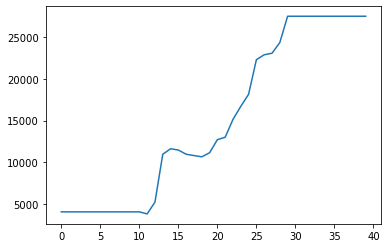

In [14]:
X = loadBalancer.X[-100,:]
X
pred = []
for n  in range(0,40):
    X_ = np.append(X[:-1], n)
    rewardHat = loadBalancer.model.predict(X_[None,:])[0]
    pred.append(rewardHat)

plt.plot(range(0,40), pred)

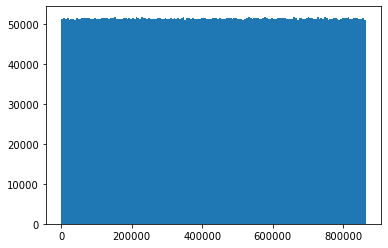

In [14]:
plt.hist(env.logTime['arrivalEvent'], bins=7*24);

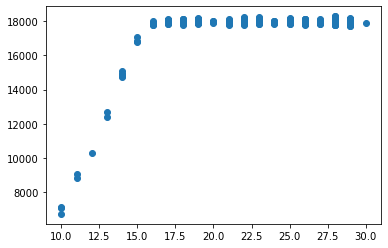

In [15]:
plt.scatter(env.log['numberOfServers'][::2], env.log['reward'])

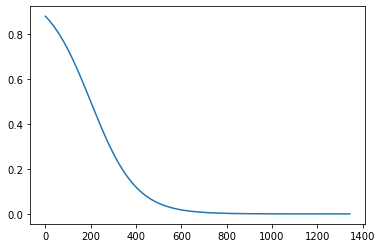

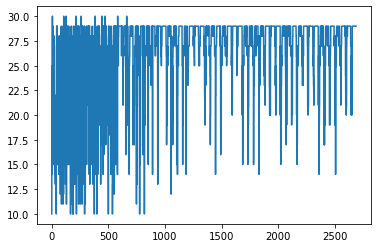

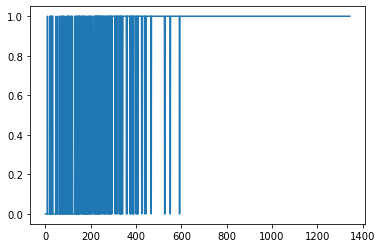

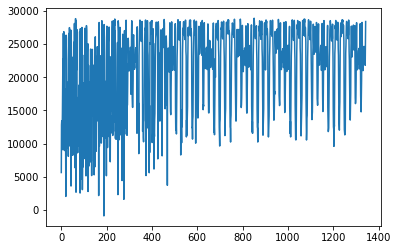

Error in callback <function flush_figures at 0x7f7a6d2114c0> (for post_execute):


KeyboardInterrupt: 

In [15]:
plt.plot(env.log['eta'])
plt.figure()
plt.plot(env.log['numberOfServers'])
plt.figure()
plt.plot(env.log['greedyEpsilonActionType'])
plt.figure()
plt.plot(env.log['reward'])
plt.figure()
plt.hist(env.logTime['arrivalEvent'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestProcessed'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestCancelled'], bins=int(stopTime/60/60));

In [19]:
for key in ['numberOfServers','requestProcessed', 'totalTimeInSystem', 'eta', 'requestCancelled','reward','greedyEpsilonActionType']:
    series = pd.Series(index=env.logTime[key], data=env.log[key])
    series.to_csv(f"../data/seasonalEpsilonGreedy/{key}.csv")

In [18]:
env.log.keys()

dict_keys(['totalInQueue', 'arrivalsPerSecond', 'requestStartWaiting', 'requestType', 'arrivalEvent', 'requestWaitingTime', 'queueSize_0', 'queueSize_1', 'requestProcessed', 'totalTimeInSystem', 'queueSize_2', 'queueSize_3', 'queueSize_5', 'queueSize_7', 'queueSize_8', 'queueSize_9', 'queueSize_4', 'queueSize_6', 'requestCancelled', 'reward', 'eta', 'greedyEpsilonActionType', 'numberOfServers', 'queueSize_11', 'queueSize_14', 'queueSize_13', 'queueSize_12', 'queueSize_10', 'queueSize_15', 'queueSize_16', 'queueSize_17', 'queueSize_18'])

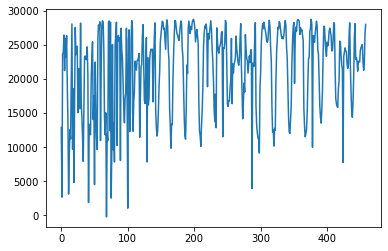

In [10]:
plt.plot(np.array(env.log['reward'])[np.array(env.log['greedyEpsilonActionType'])==1.0])

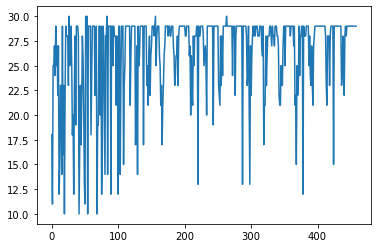

In [11]:
plt.plot(np.array(env.log['numberOfServers'][::2])[np.array(env.log['greedyEpsilonActionType'])==1.0])

In [ ]:
import pickle 
with open('../data/egperiodicresults.pkl','wb') as f:
    pickle.dump(env.log)

with open('../data/egperiodicresultsTime.pkl','wb') as f:
    pickle.dump(env.logTime)

Text(0, 0.5, 'y')

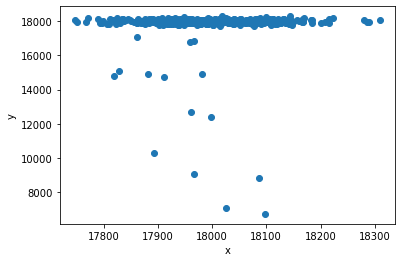

In [19]:
plt.scatter(loadBalancer.X[:-1,2],loadBalancer.y)
plt.xlabel('x')
plt.ylabel('y')

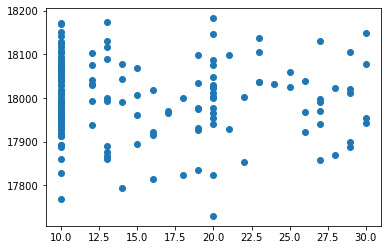

In [52]:
plt.scatter(env.log['numberOfServers'][0::2],env.log['reward'])

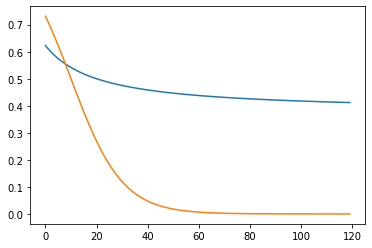

In [31]:

def sigmoid(x):
      return 1 / (1 + np.exp(-x))

x = np.arange(0,120,1)
plt.plot(x, sigmoid(2/(0.1*x+2)-0.5))
plt.plot(x, sigmoid(1-0.1*x))

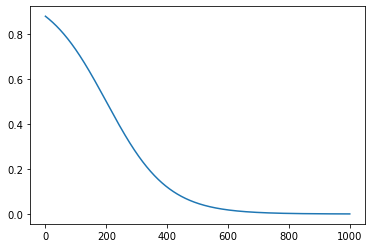

In [34]:
x = np.arange(0,1000,1)
plt.plot(x, sigmoid(2-0.01*x))

In [43]:
loadBalancer.X[-100,:-1]

array([1.65307145e+01, 1.80810000e+04, 1.80810000e+04, 1.51028865e+00,
       1.80750000e+04, 3.01130382e+00, 1.70000000e+01])

In [52]:
A = np.array([0,0.1,0,0,0,0,0.1])
print(loadBalancer.X[-100,:-1]@A/60/60)
sigmoid(loadBalancer.X[-100,:-1]@A/60/60) * 20

0.5027222222222223


12.461976998873004

In [53]:
loadBalancer.X[-100,:-1]

array([1.65307145e+01, 1.80810000e+04, 1.80810000e+04, 1.51028865e+00,
       1.80750000e+04, 3.01130382e+00, 1.70000000e+01])

In [54]:
1.80810000e+04

18081.0